In [1]:
#importing all the required modules
import pandas as pd
import numpy as np
import networkx as nx
from tqdm import tqdm
import warnings
from statistics import median

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

%matplotlib inline
warnings.filterwarnings('ignore')

# Data Collection and Data Preprocessing

In [2]:
#Reading the csv file containing all the records
df = pd.read_csv("Deliveries IPL 2020.csv")
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1216492,1,MI,CSK,1,1,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
1,1216492,1,MI,CSK,1,2,RG Sharma,Q de Kock,DL Chahar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
2,1216492,1,MI,CSK,1,3,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
3,1216492,1,MI,CSK,1,4,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
4,1216492,1,MI,CSK,1,5,Q de Kock,RG Sharma,DL Chahar,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [3]:
#Checking for the null values 
df.isnull().sum()

match_id                0
inning                  0
batting_team            0
bowling_team            0
over                    0
ball                    0
batsman                 0
non_striker             6
bowler                  0
is_super_over           0
wide_runs               0
bye_runs                0
legbye_runs             0
noball_runs             0
penalty_runs            0
batsman_runs            0
extra_runs              0
total_runs              0
player_dismissed    14113
dismissal_kind      14113
fielder             14276
dtype: int64

In [4]:
#Different teams in IPL dataset
arr=df['batting_team'].unique()
arr

array(['MI', 'CSK', 'DC', 'KXIP', 'RCB', 'SRH', 'RR', 'KKR'], dtype=object)

In [5]:
#Finding different players of the various teams
for i in range(0,8):
    df_team=df[df['batting_team']==arr[i]]
    print(df_team['batsman'].unique())

['RG Sharma' 'Q de Kock' 'AS Yadav' 'SS Tiwary' 'HH Pandya' 'KA Pollard'
 'KH Pandya' 'JL Pattinson' 'RD Chahar' 'TA Boult' 'JJ Bumrah'
 'Ishan Kishan' 'NM Coulter-Nile' 'SA Yadav' 'DS Kulkarni']
['M Vijay' 'SR Watson' 'F du Plessis' 'AT Rayudu' 'RA Jadeja' 'S Curran'
 'MS Dhoni' 'KM Jadhav' 'RD Gaikwad' 'Jagadeesan' 'DJ Bravo' 'DL Chahar'
 'SN Thakur' 'Imran Tahir']
['P Shaw' 'S Dhawan' 'S Hetmyer' 'SS Iyer' 'RR Pant' 'AR Patel'
 'MP Stoinis' 'R Ashwin' 'K Rabada' 'Anrich Nortje' 'HV Patel' 'AM Rahane'
 'Carey' 'Deshpande' 'Praveen Dubey' 'SV Samson']
['KL Rahul' 'MA Agarwal' 'KK Nair' 'N Pooran' 'GJ Maxwell' 'SN Khan'
 'K Gowtham' 'CJ Jordan' 'JDS Neesham' 'Ravi Bishnoi' 'Mohammed Shami'
 'Mandeep Singh' 'Simran Singh' 'Mujeeb Ur Rahman' 'Cottrell'
 'Arshdeep Singh' 'Prabhsimran Singh' 'CH Gayle' 'DJ Hooda' 'M Ashwin']
['D Padikkal' 'AJ Finch' 'AB de Villiers' 'V Kohli' 'S Dube' 'Philippe'
 'Washington Sundar' 'UT Yadav' 'N Saini' 'DW Steyn' 'YS Chahal' 'M Ali'
 'I Udana' 'Mohammed S

# Matrix of batsmen showing total runs made by them while playing together

In [6]:
from matplotlib.pyplot import figure
from numpy import array
new=[]

for b in range(0,8):
    df_team=df[df['batting_team']==arr[b]]
    df_team=df_team.iloc[:,[2,3,6,7,8,15,17]]  #Taking the required attributes
    player=df_team['batsman'].unique()
    x=np.count_nonzero(player)
    
    adj=pd.DataFrame(np.zeros((x,x)),index=player,columns=player)
    for i in player:
        for j in player:
            for k in df_team.index:
                if((df_team.loc[k,'batsman']==i) & (df_team.loc[k,'non_striker']==j)):
                    adj.loc[i,j]=adj.loc[i,j]+df_team.loc[k,'batsman_runs']
                    
    adj1=pd.DataFrame(np.zeros((x,x)),index=player,columns=player)
    for i in player:
        for j in player:
            if adj.loc[i,j]==0 and adj.loc[j,i]==0:
                pass
            elif i!=j:
                adj1.loc[i,j]=adj.loc[i,j]/(adj.loc[i,j] +adj.loc[j,i])    
    
    adj=adj1
    new.append(adj)
np.array(new).shape
new    

[                 RG Sharma  Q de Kock  AS Yadav  SS Tiwary  HH Pandya  \
 RG Sharma         0.000000   0.400602  0.425532   0.533333   0.500000   
 Q de Kock         0.599398   0.000000  0.476636   0.000000   0.500000   
 AS Yadav          0.574468   0.523364  0.000000   0.385542   0.543307   
 SS Tiwary         0.466667   0.000000  0.614458   0.000000   0.476190   
 HH Pandya         0.500000   0.500000  0.456693   0.523810   0.000000   
 KA Pollard        0.292683   0.333333  0.500000   1.000000   0.593496   
 KH Pandya         0.000000   0.641509  0.360656   0.000000   0.100000   
 JL Pattinson      0.000000   0.000000  0.000000   0.000000   0.000000   
 RD Chahar         0.000000   0.000000  0.000000   0.000000   0.000000   
 TA Boult          0.000000   0.000000  0.000000   0.000000   0.000000   
 JJ Bumrah         0.000000   0.000000  0.000000   0.000000   0.000000   
 Ishan Kishan      0.509434   0.520710  0.417266   0.000000   0.464567   
 NM Coulter-Nile   0.000000   0.000000

In [7]:
#Adjacency Matrix of Team MI
new[0]

,RG Sharma,Q de Kock,AS Yadav,SS Tiwary,HH Pandya,KA Pollard,KH Pandya,JL Pattinson,RD Chahar,TA Boult,JJ Bumrah,Ishan Kishan,NM Coulter-Nile,SA Yadav,DS Kulkarni
RG Sharma,0.000000,0.400602,0.425532,0.533333,0.500000,0.707317,0.000000,0.000000,0.000000,0.0,0.000000,0.490566,0.000000,0.577778,0.00
Q de Kock,0.599398,0.000000,0.476636,0.000000,0.500000,0.666667,0.358491,0.000000,0.000000,0.0,0.000000,0.479290,0.000000,0.476744,0.00
AS Yadav,0.574468,0.523364,0.000000,0.385542,0.543307,0.500000,0.639344,0.000000,0.000000,0.0,0.000000,0.582734,0.000000,0.000000,0.00
SS Tiwary,0.466667,0.000000,0.614458,0.000000,0.476190,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.00
HH Pandya,0.500000,0.500000,0.456693,0.523810,0.000000,0.406504,0.900000,0.000000,0.000000,0.0,0.000000,0.535433,0.000000,0.000000,0.00
KA Pollard,0.292683,0.333333,0.500000,1.000000,0.593496,0.000000,0.389831,0.767442,0.000000,0.0,0.000000,0.491713,0.568966,1.000000,0.00
KH Pandya,0.000000,0.641509,0.360656,0.000000,0.100000,0.610169,0.000000,0.000000,0.000000,0.0,0.000000,0.350000,0.000000,0.000000,0.00
JL Pattinson,0.000000,0.000000,0.000000,0.000000,0.000000,0.232558,0.000000,0.000000,0.800000,0.0,0.000000,0.000000,0.000000,0.000000,0.25
RD Chahar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,0.00
TA Boult,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00


# Network Graph of Teams batsmen

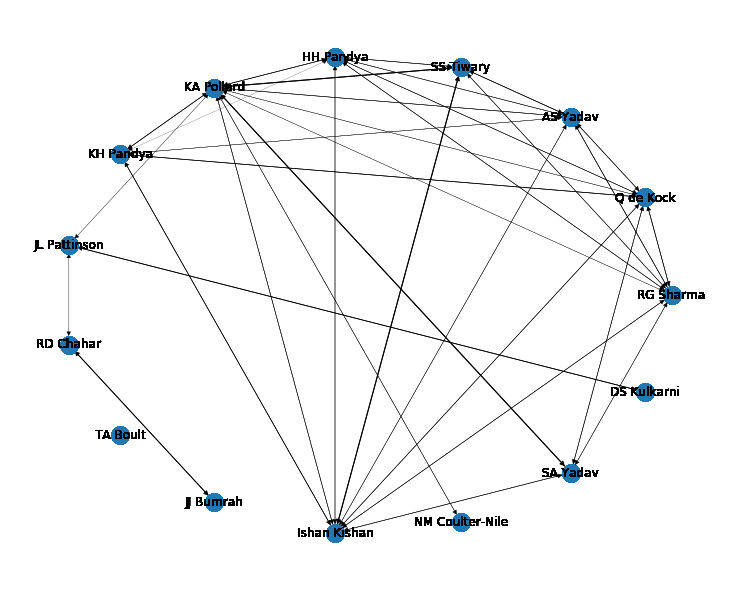

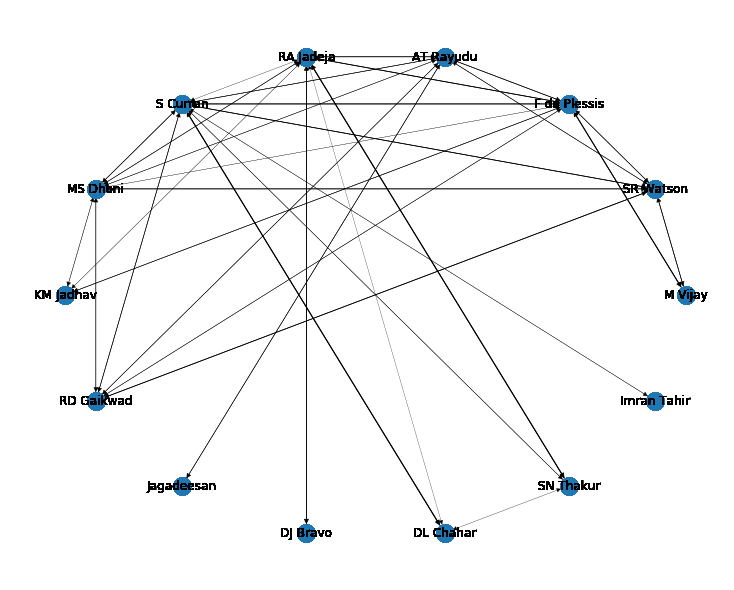

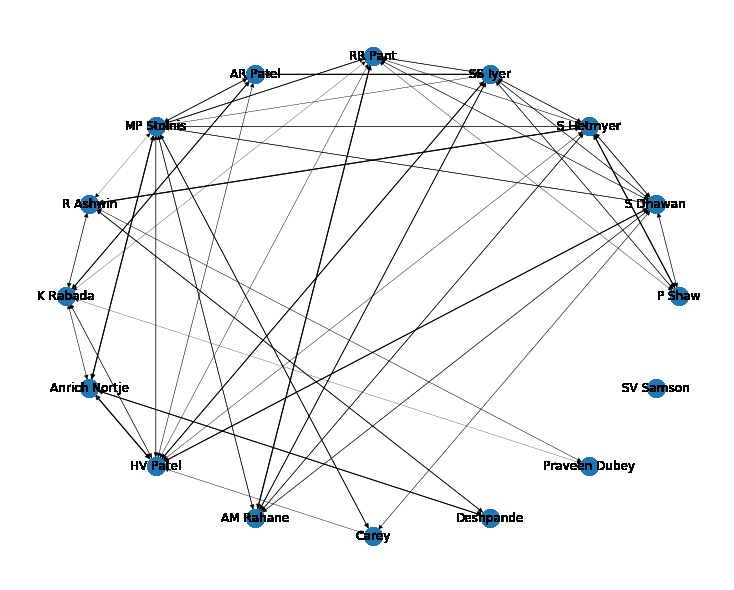

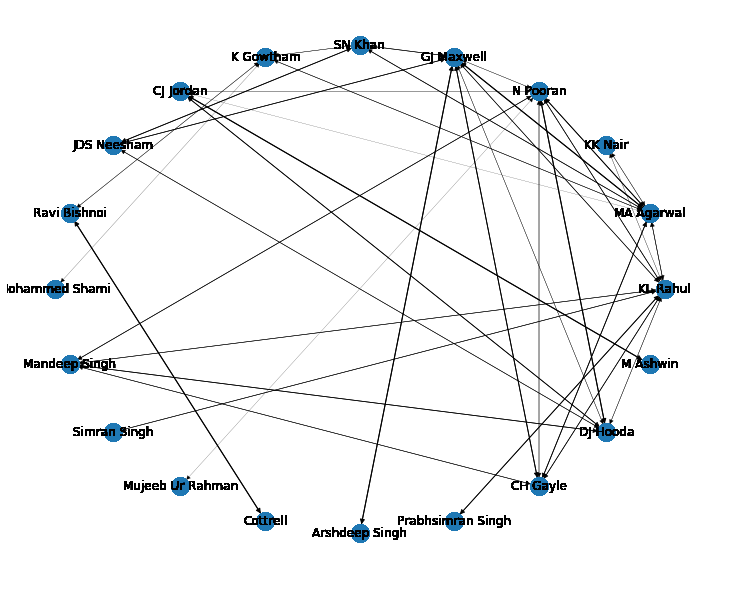

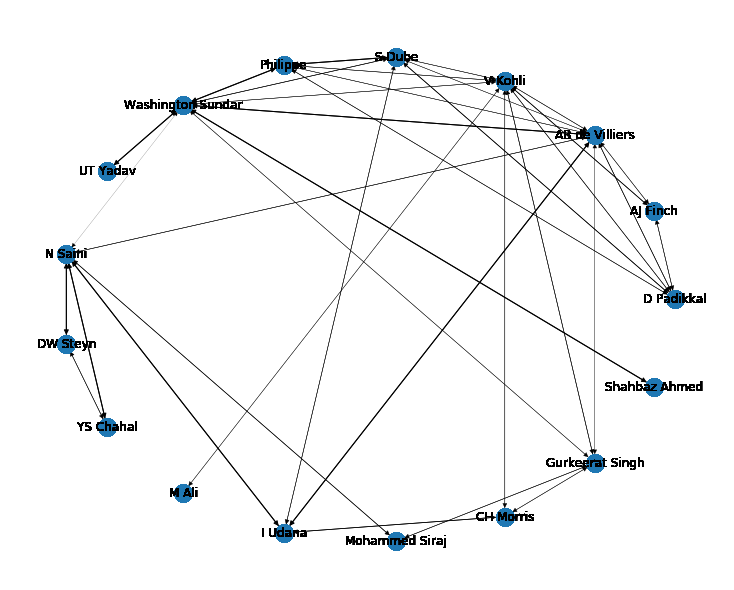

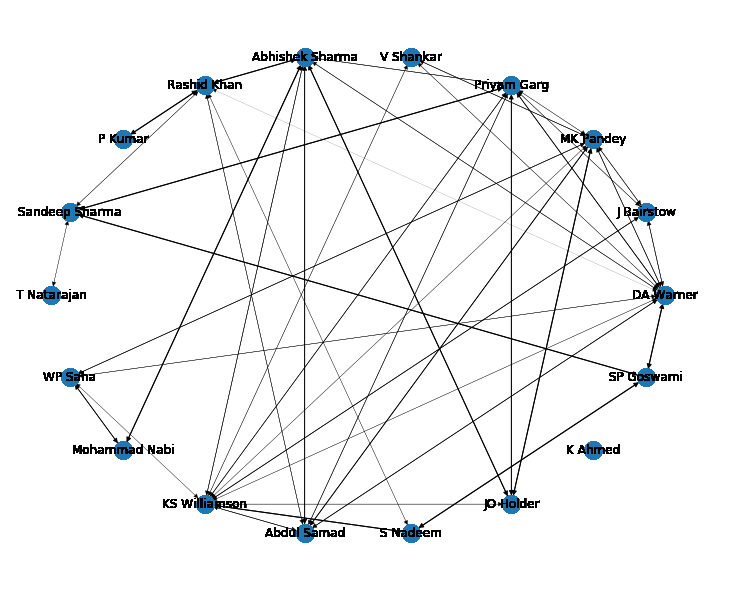

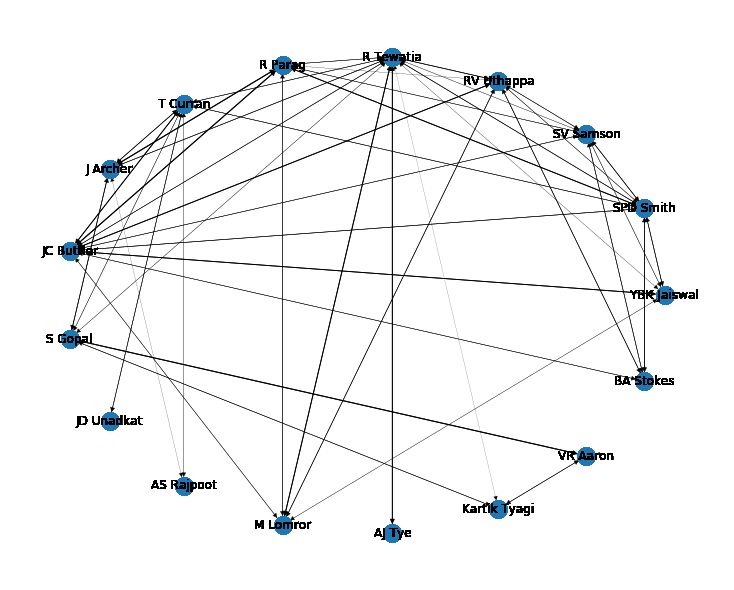

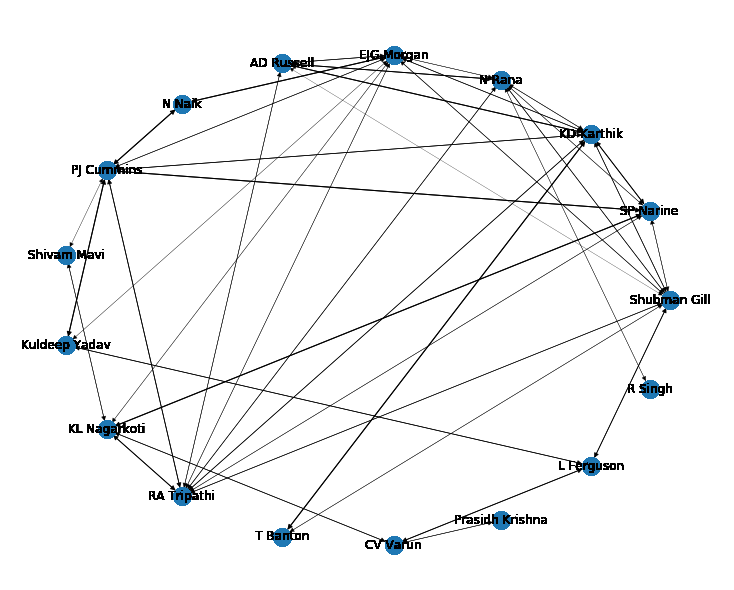

In [8]:
pp = PdfPages('PShip_Network.pdf')
for i in range(0,8):    
    G = nx.from_pandas_adjacency(new[i])
    G=nx.DiGraph(G) 
    figure(figsize=(10, 8))
    for edge in G.edges(data='weight'):
        nx.draw_shell(G, with_labels=True,edgelist=[edge],width=edge[2]) 
    plt.savefig("PShip_Network_%s.jpg"%arr[i])
    pp.savefig()    #plt.savefig(pp, format='pdf')
pp.close()

# Dijkstra Shortest Path Algorithm

In [9]:
def dijkstra(graph, start):
    """
    Implementation of dijkstra using adjacency matrix.
    This returns an array containing the length of the shortest path from the start node to each other node.
    It is only guaranteed to return correct results if there are no negative edges in the graph. Positive cycles are fine.
    This has a runtime of O(|V|^2) (|V| = number of Nodes), for a faster implementation see @see ../fast/Dijkstra.java (using adjacency lists)

    :param graph: an adjacency-matrix-representation of the graph where (x,y) is the weight of the edge or 0 if there is no edge.
    :param start: the node to start from.
    :return: an array containing the shortest distances from the given start node to each other node
    """
    # This contains the distances from the start node to all other nodes
    distances = [float("inf") for _ in range(len(graph))]

    # This contains whether a node was already visited
    visited = [False for _ in range(len(graph))]

    # The distance from the start node to itself is of course 0
    distances[start] = 0

    # While there are nodes left to visit...
    while True:

        # ... find the node with the currently shortest distance from the start node...
        shortest_distance = float("inf")
        shortest_index = -1
        for i in range(len(graph)):
            # ... by going through all nodes that haven't been visited yet
            if distances[i] < shortest_distance and not visited[i]:
                shortest_distance = distances[i]
                shortest_index = i

        # print("Visiting node " + str(shortest_index) + " with current distance " + str(shortest_distance))

        if shortest_index == -1:
            # There was no node not yet visited --> We are done
            return distances

        # ...then, for all neighboring nodes that haven't been visited yet....
        for i in range(len(graph[shortest_index])):
            # ...if the path over this edge is shorter...
            if graph[shortest_index][i] != 0 and distances[i] > distances[shortest_index] + graph[shortest_index][i]:
                # ...Save this path as new shortest path.
                distances[i] = distances[shortest_index] + graph[shortest_index][i]
                # print("Updating distance of node " + str(i) + " to " + str(distances[i]))

        # Lastly, note that we are finished with this node.
        visited[shortest_index] = True
        # print("Visited nodes: " + str(visited))
        # print("Currently lowest distances: " + str(distances))
        #return distances

# Finding out different types of centralities

In [10]:
import os
os.remove("PShip_Centralities.csv")
new_1=[]
for i in range(0,8):
    perf=new[i].copy()
    perf['degree_centrality']=perf[list(perf)].sum(axis=1)
    perf_list = new[i].values.tolist()
    l=[]
    
    for j in range(len(perf_list)):
        distances = dijkstra(perf_list, j)
       
        summation=0
        for num in distances:
            if num!=float("inf"):
                summation+=num
        if summation!=0:
            l.append(summation**-1)
        else:
            l.append(0)
    se = pd.Series(l)
    perf['closeness_centrality'] = se.values
    G = nx.from_pandas_adjacency(new[i])
    G=nx.DiGraph(G) 
    bet_centrality = nx.betweenness_centrality(G, normalized = True,  endpoints = False,weight='weight')
    se = pd.Series(list(bet_centrality.values()))
    perf['Betweness_centrality'] = se.values
    eigen_centrality = nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight='weight')
    se = pd.Series(list(eigen_centrality.values()))
    perf['Eigen_centrality'] = se.values
    new_1.append(perf)
    perf.to_csv("PShip_Centralities.csv",mode='a')    

In [11]:
#Matrix having centrality appended
new_1[0]

,RG Sharma,Q de Kock,AS Yadav,SS Tiwary,HH Pandya,KA Pollard,KH Pandya,JL Pattinson,RD Chahar,TA Boult,JJ Bumrah,Ishan Kishan,NM Coulter-Nile,SA Yadav,DS Kulkarni,degree_centrality,closeness_centrality,Betweness_centrality,Eigen_centrality
RG Sharma,0.000000,0.400602,0.425532,0.533333,0.500000,0.707317,0.000000,0.000000,0.000000,0.0,0.000000,0.490566,0.000000,0.577778,0.00,3.635129,0.073604,0.175824,3.127417e-01
Q de Kock,0.599398,0.000000,0.476636,0.000000,0.500000,0.666667,0.358491,0.000000,0.000000,0.0,0.000000,0.479290,0.000000,0.476744,0.00,3.557224,0.074813,0.000000,3.159461e-01
AS Yadav,0.574468,0.523364,0.000000,0.385542,0.543307,0.500000,0.639344,0.000000,0.000000,0.0,0.000000,0.582734,0.000000,0.000000,0.00,3.748760,0.077494,0.000000,3.237394e-01
SS Tiwary,0.466667,0.000000,0.614458,0.000000,0.476190,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.00,2.557315,0.060228,0.000000,3.666755e-01
HH Pandya,0.500000,0.500000,0.456693,0.523810,0.000000,0.406504,0.900000,0.000000,0.000000,0.0,0.000000,0.535433,0.000000,0.000000,0.00,3.822440,0.080753,0.065934,3.072272e-01
KA Pollard,0.292683,0.333333,0.500000,1.000000,0.593496,0.000000,0.389831,0.767442,0.000000,0.0,0.000000,0.491713,0.568966,1.000000,0.00,5.937463,0.102157,0.483516,4.240266e-01
KH Pandya,0.000000,0.641509,0.360656,0.000000,0.100000,0.610169,0.000000,0.000000,0.000000,0.0,0.000000,0.350000,0.000000,0.000000,0.00,2.062335,0.082173,0.000000,2.395776e-01
JL Pattinson,0.000000,0.000000,0.000000,0.000000,0.000000,0.232558,0.000000,0.000000,0.800000,0.0,0.000000,0.000000,0.000000,0.000000,0.25,1.282558,0.110562,0.351648,2.840886e-02
RD Chahar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.0,0.166667,0.000000,0.000000,0.000000,0.00,0.366667,0.101578,0.131868,1.649970e-03
TA Boult,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,1.548067e-10


# Bar Graph showing Betweenness Centrality

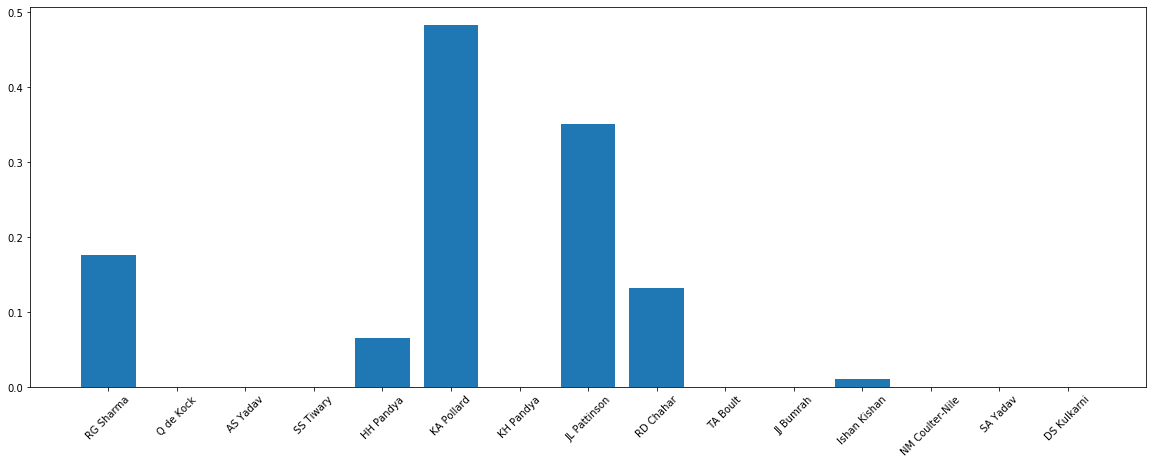

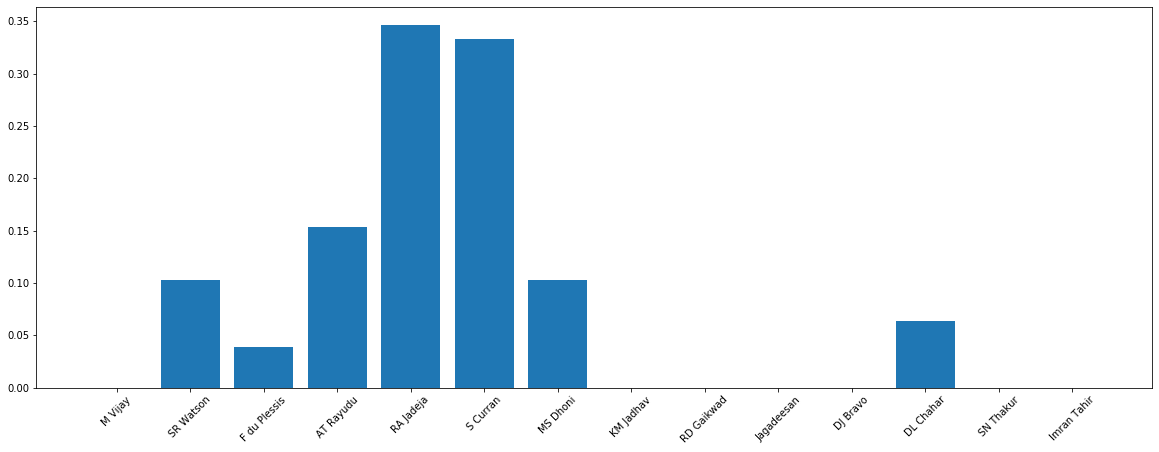

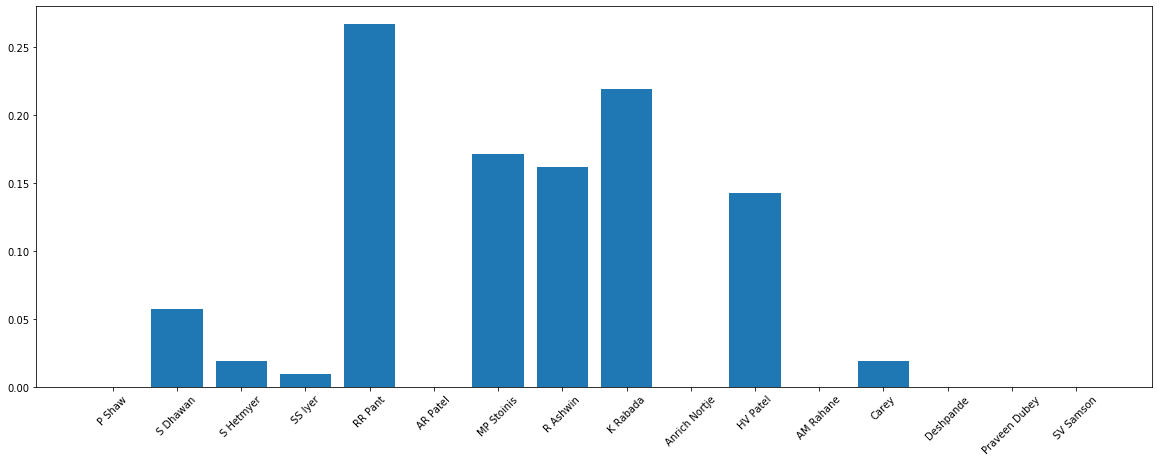

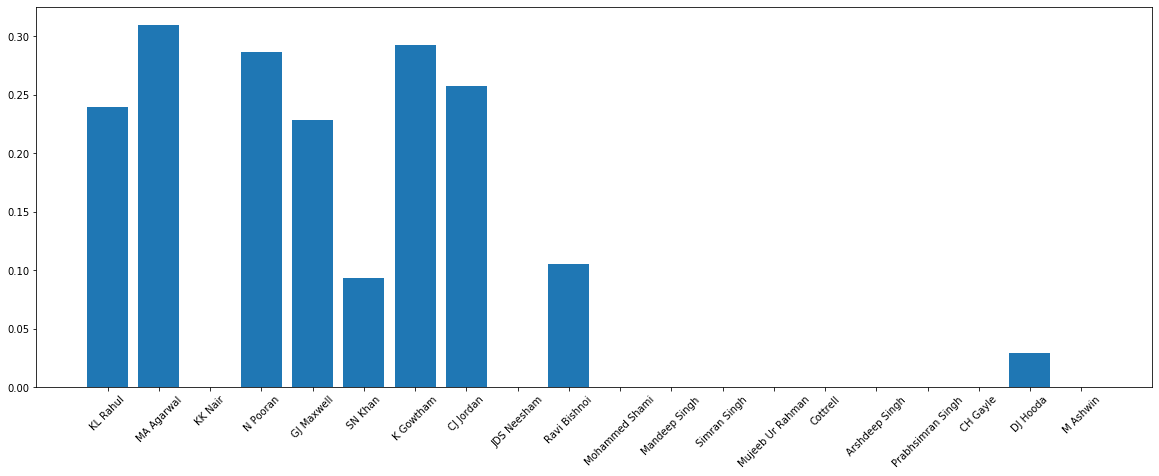

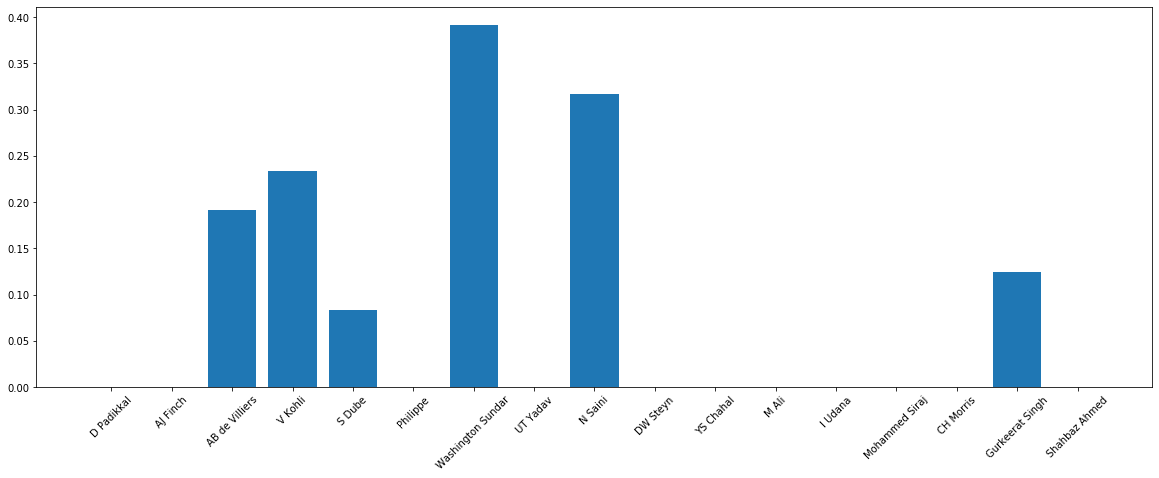

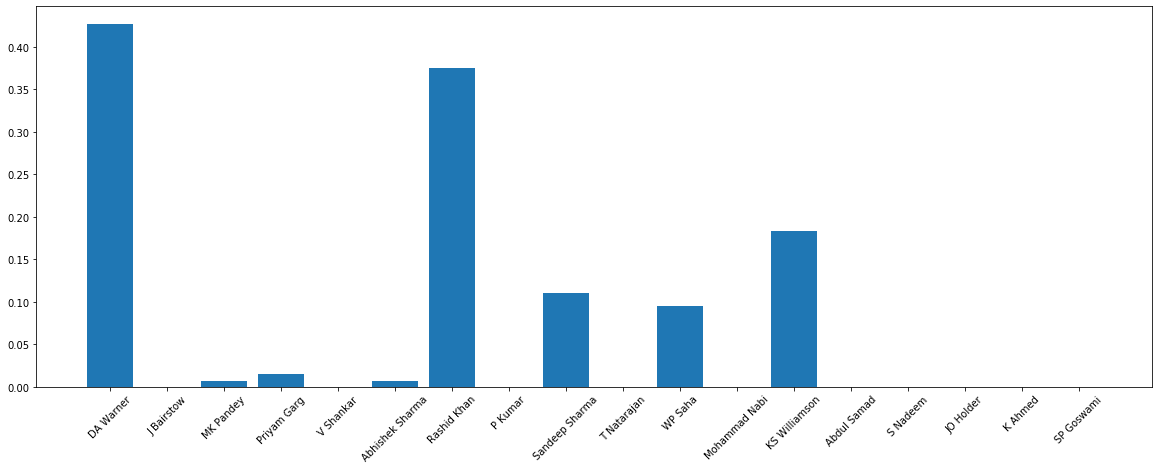

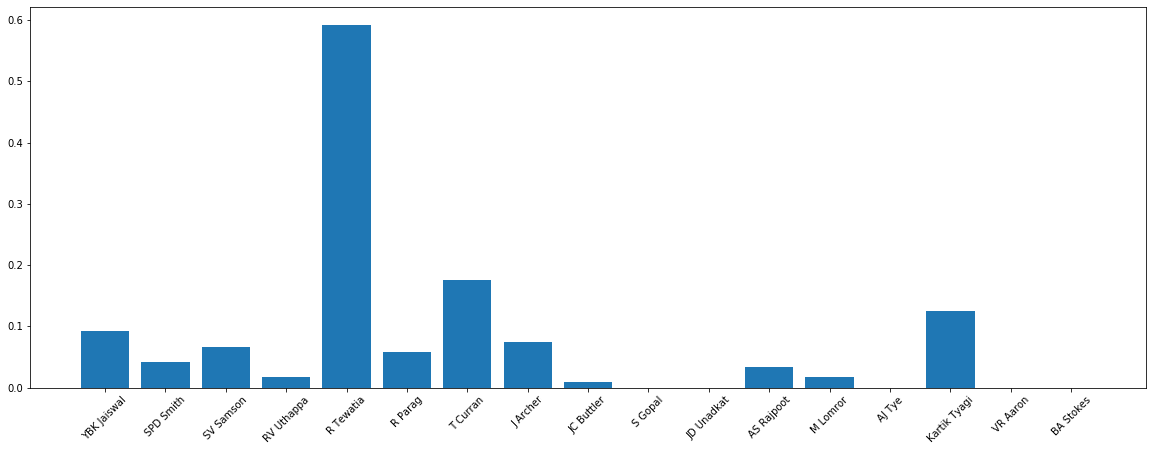

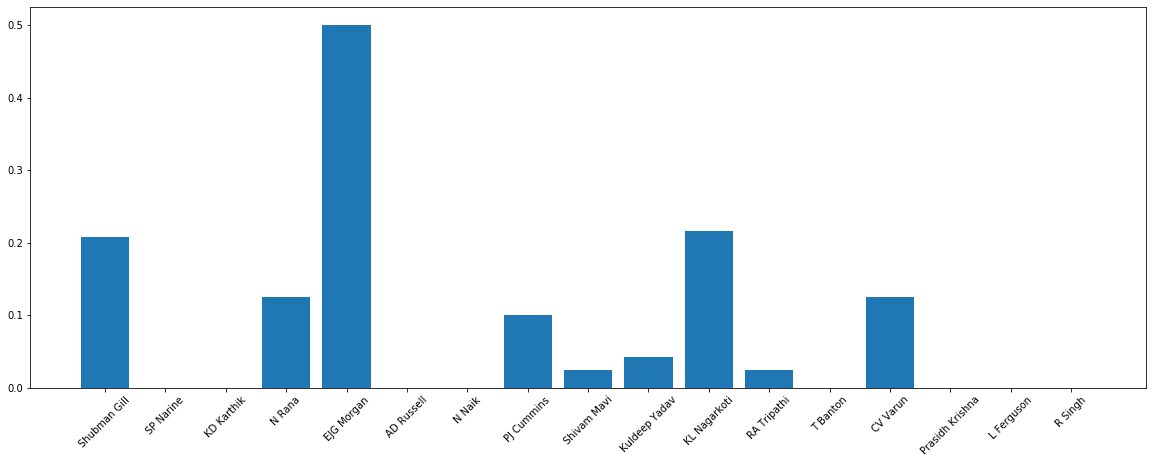

In [12]:
pp = PdfPages('PShip_BC.pdf')
for i in range(0,8):
    G = nx.from_pandas_adjacency(new[i])
    G=nx.DiGraph(G) 
    bet_centrality = nx.betweenness_centrality(G, normalized = True,  endpoints = False,weight='weight')
    names = list(bet_centrality.keys())
    values = list(bet_centrality.values())
    plt.figure(figsize = (20,7))
    #tick_label does the some work as plt.xticks()
    plt.bar(range(len(bet_centrality)),values,tick_label=names)
    plt.xticks(rotation=45)
    plt.savefig("PShip_BC_%s.jpg"%arr[i])
    pp.savefig()    
    plt.show()
pp.close()    

# Bar Graph showing Eigenvector Centrality

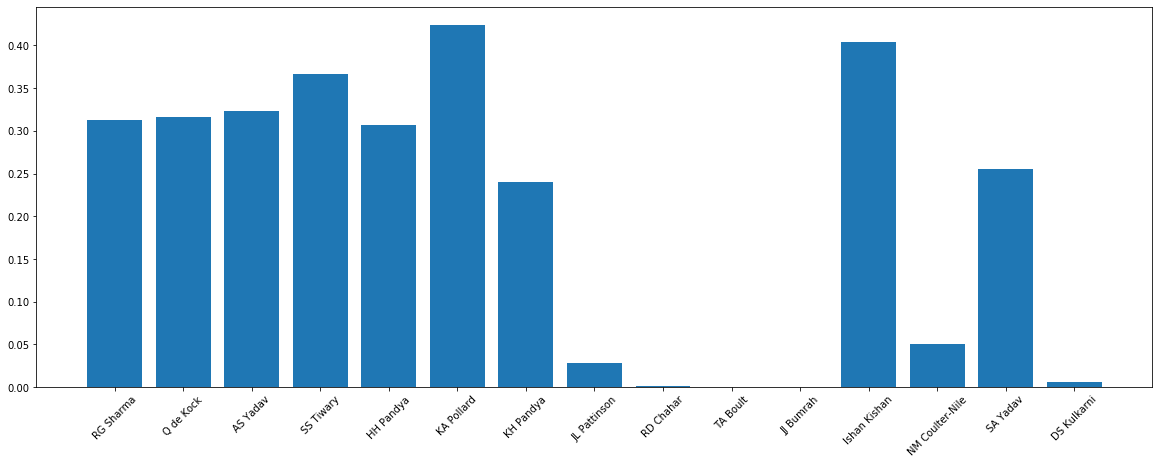

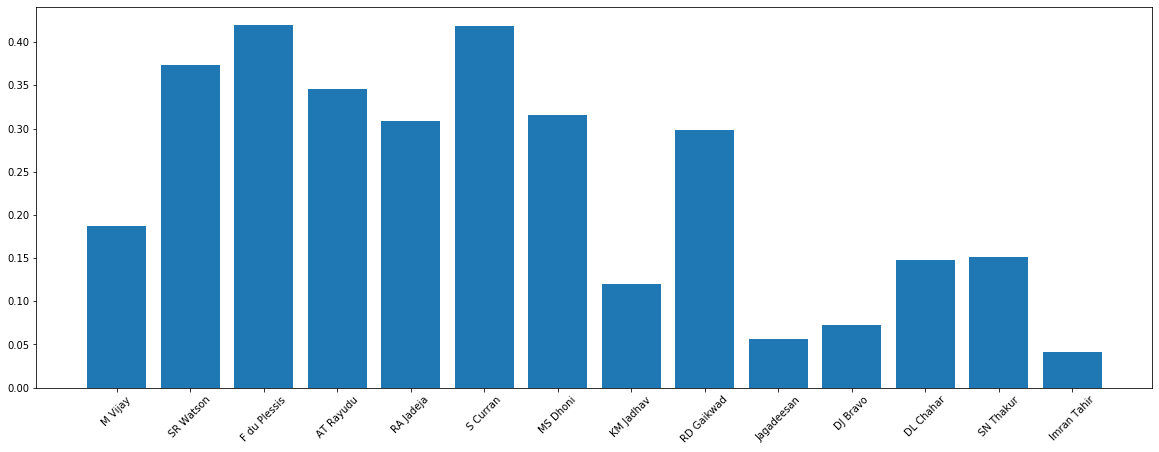

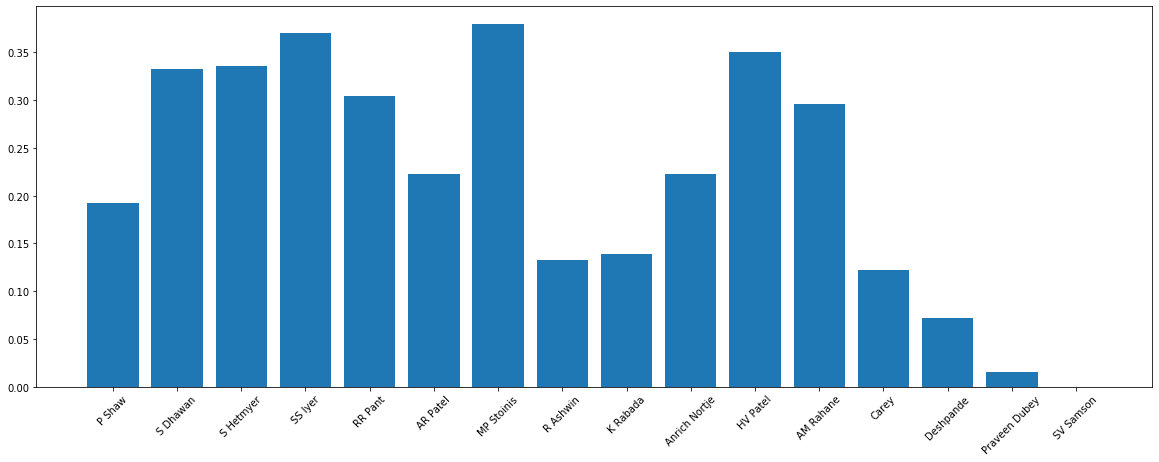

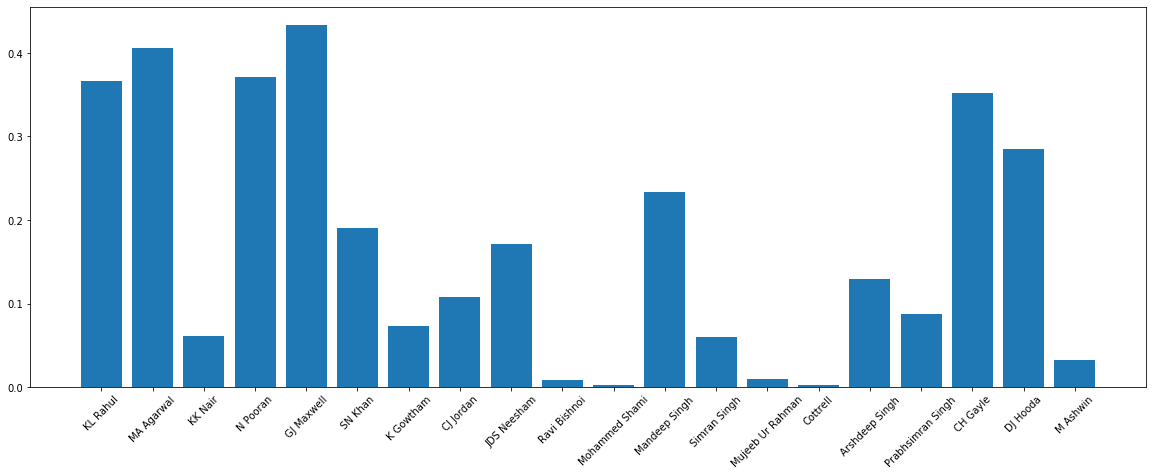

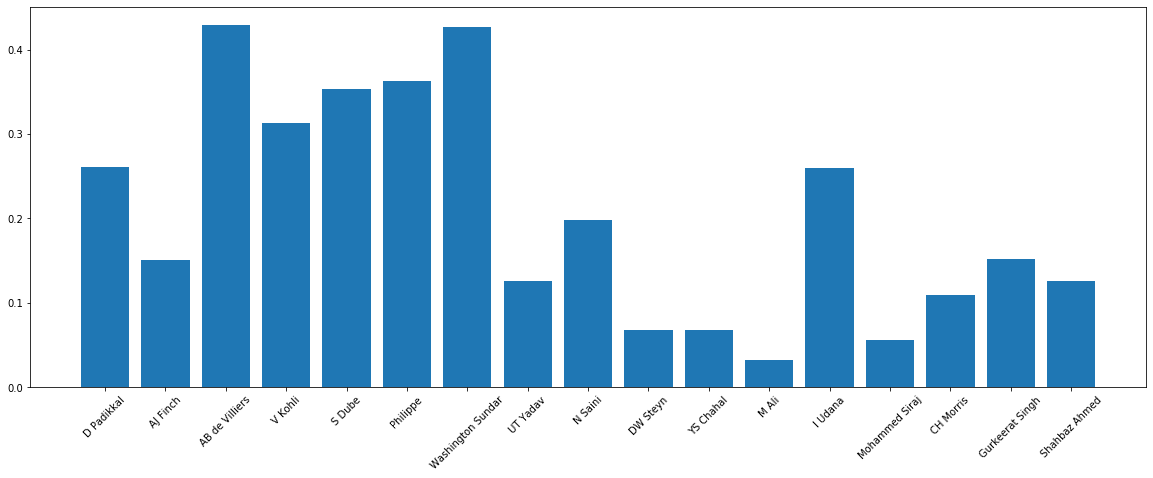

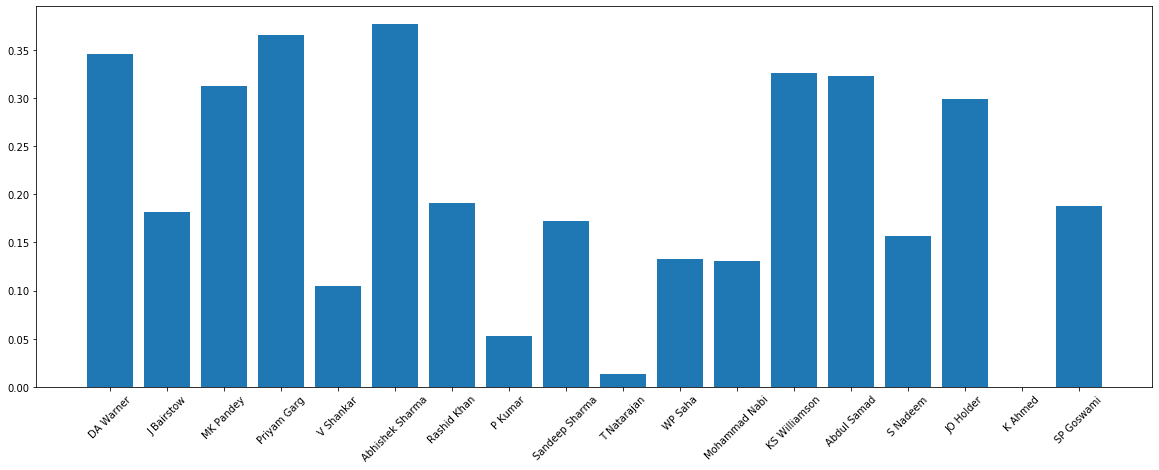

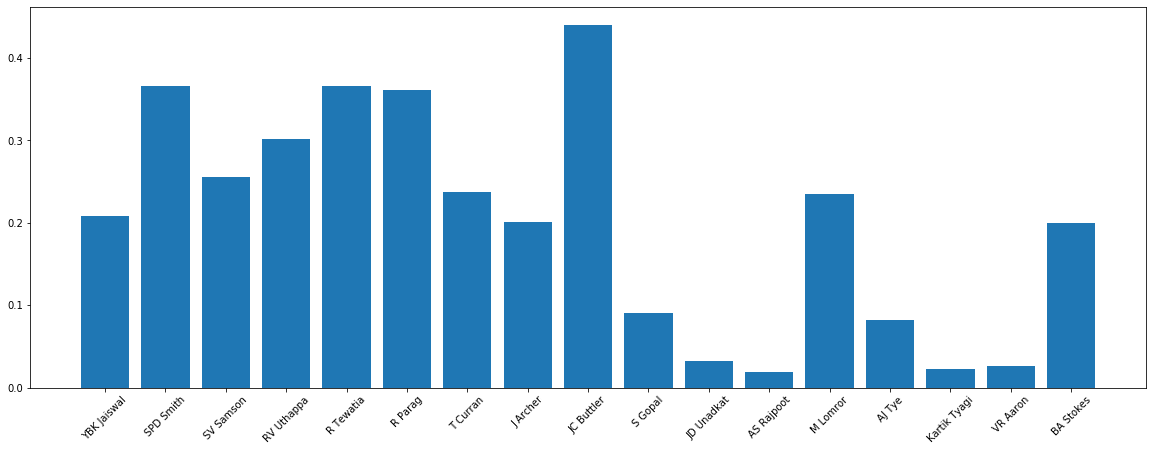

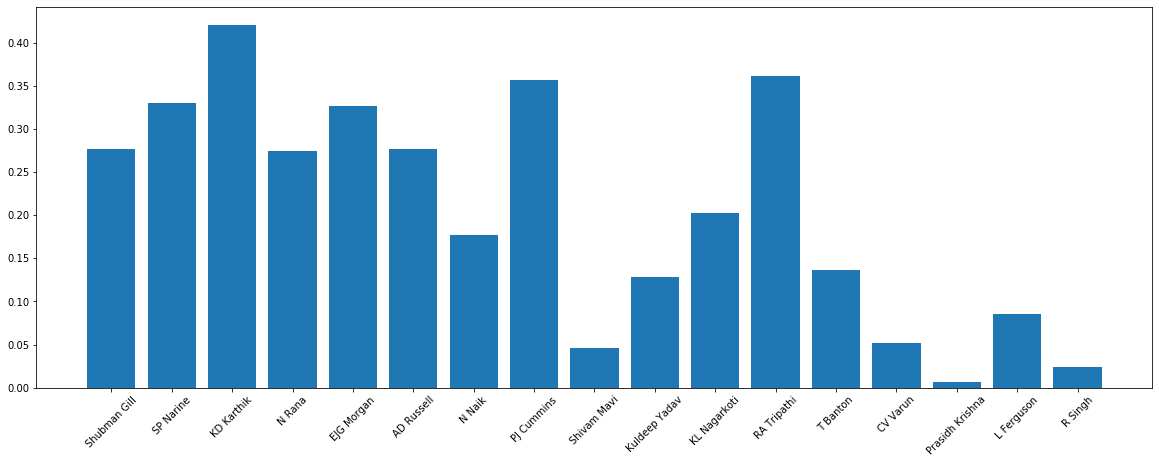

In [13]:
pp = PdfPages('PShip_EVC.pdf')
for i in range(0,8):
    G = nx.from_pandas_adjacency(new[i])
    G=nx.DiGraph(G) 

    eigen_centrality = nx.eigenvector_centrality(G, max_iter=100, tol=1e-06, nstart=None, weight='weight')
    names = list(eigen_centrality.keys())
    values = list(eigen_centrality.values())
    plt.figure(figsize = (20,7))
    #tick_label does the some work as plt.xticks()
    plt.bar(range(len(eigen_centrality)),values,tick_label=names)
    plt.xticks(rotation=45)
    plt.savefig("PShip_EVC_%s.jpg"%arr[i])
    pp.savefig()    
    plt.show()
pp.close()  

# Clustering Coefficient 

In [14]:
for i in range(0,8):
    G = nx.from_pandas_adjacency(new[i])
    G=nx.DiGraph(G) 
    cluster = nx.clustering(G,weight='weight')
    print(cluster)    

{'RG Sharma': 0.40430663242727277, 'Q de Kock': 0.39788166364691485, 'AS Yadav': 0.4254967860219875, 'SS Tiwary': 0.611654021156259, 'HH Pandya': 0.4019804958333445, 'KA Pollard': 0.24028535278794483, 'KH Pandya': 0.43436698072038277, 'JL Pattinson': 0, 'RD Chahar': 0, 'TA Boult': 0, 'JJ Bumrah': 0, 'Ishan Kishan': 0.39589349010037683, 'NM Coulter-Nile': 0, 'SA Yadav': 0.5333670502979103, 'DS Kulkarni': 0}
{'M Vijay': 0.6735400034370317, 'SR Watson': 0.4249393002189571, 'F du Plessis': 0.2875343493786495, 'AT Rayudu': 0.31539228440616707, 'RA Jadeja': 0.1634642933071476, 'S Curran': 0.22237930329376235, 'MS Dhoni': 0.32342147905213325, 'KM Jadhav': 0.37938548665938404, 'RD Gaikwad': 0.5237333290306675, 'Jagadeesan': 0, 'DJ Bravo': 0, 'DL Chahar': 0.3270452668315767, 'SN Thakur': 0.3658638312934987, 'Imran Tahir': 0}
{'P Shaw': 0.4734177937977693, 'S Dhawan': 0.34003395462427566, 'S Hetmyer': 0.3124798252377664, 'SS Iyer': 0.3445449248994281, 'RR Pant': 0.29797196528204184, 'AR Patel': 

# Players Ranking using PageRank Algorithm

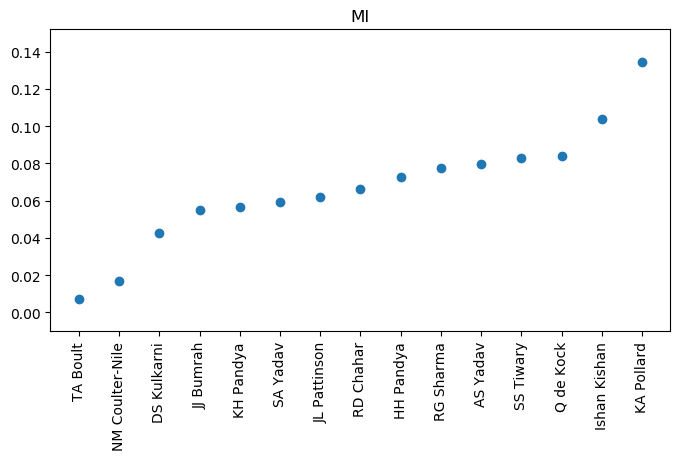

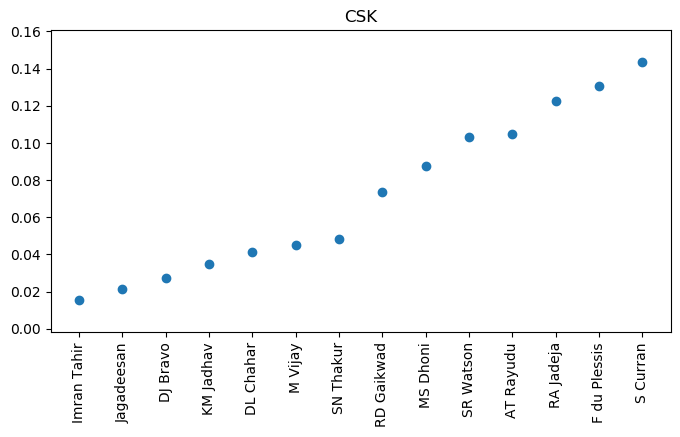

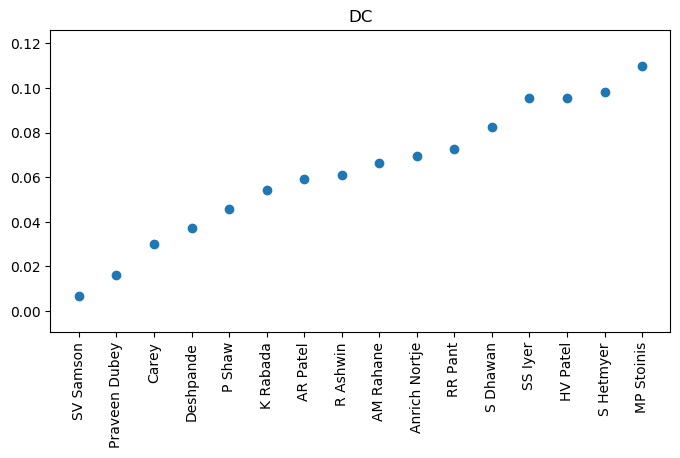

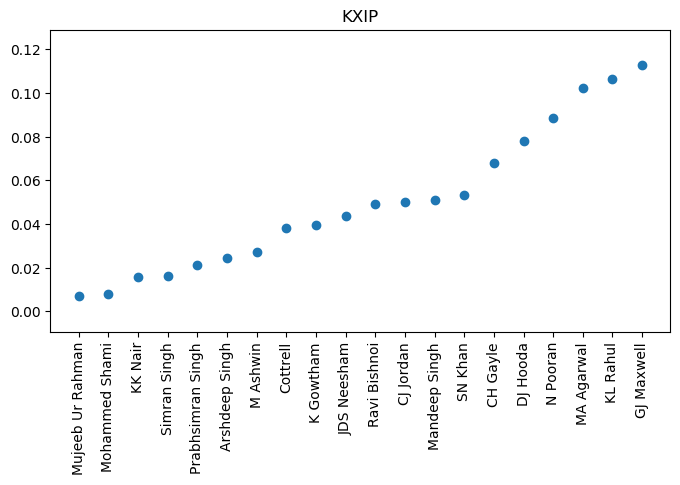

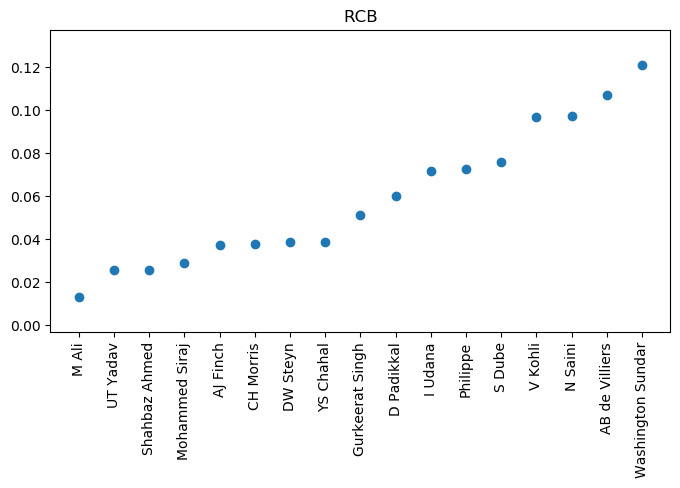

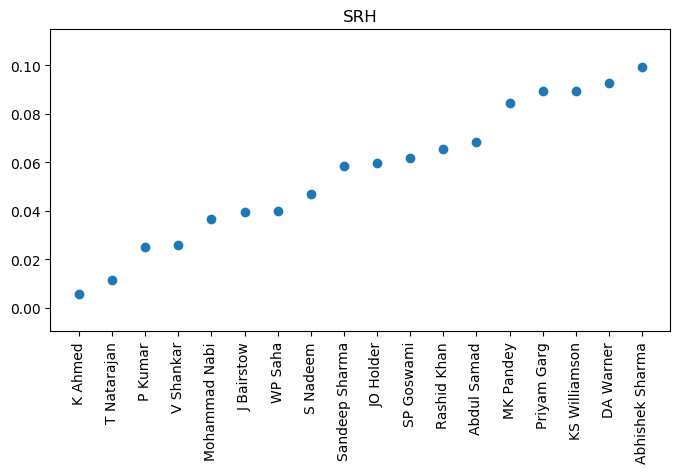

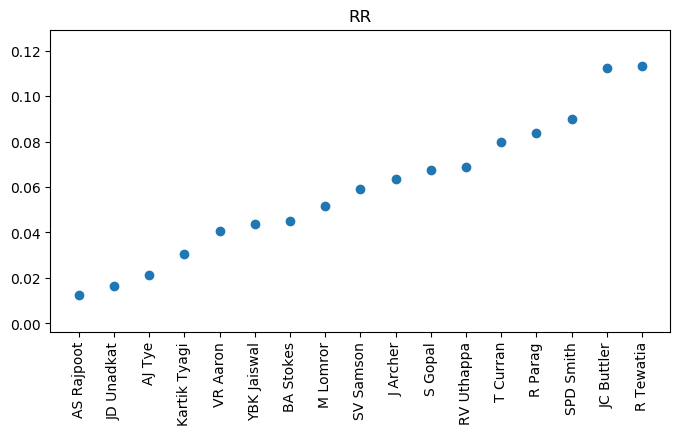

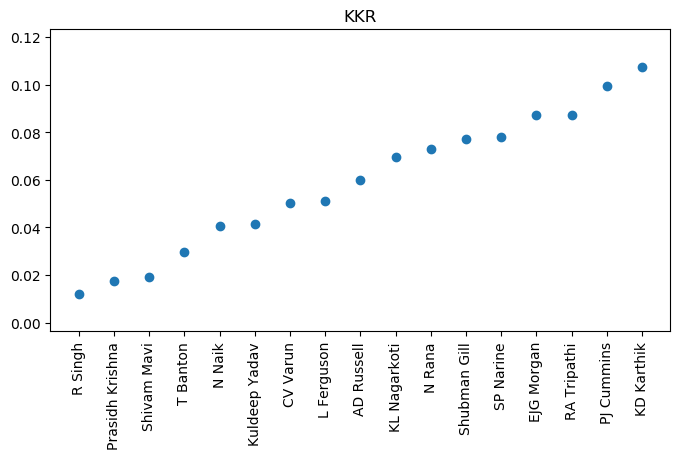

In [15]:
pp = PdfPages('PShip_PageRank.pdf')
for i in range(0,8):
    sorted_dict={}
    G = nx.from_pandas_adjacency(new[i])
    G = nx.DiGraph(G)
    pr = nx.pagerank(G, alpha=0.9,weight='weight')
    sorted_keys = sorted(pr, key=pr.get)  
    for w in sorted_keys:
        sorted_dict[w] = pr[w]
    plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':100})
    plt.title(arr[i])
    plt.xticks(rotation=90)
    plt.scatter(sorted_dict.keys(),sorted_dict.values(),label='pager rank')
    plt.savefig("PShip_PageRank_%s.jpg"%arr[i])
    pp.savefig()    
    plt.show()
pp.close()  

In [16]:
for i in range(0,8):
   # sorted_dict={}
    G = nx.from_pandas_adjacency(new[i])
    G = nx.DiGraph(G)
    pr = nx.pagerank(G, alpha=0.9,weight='weight')
    #sorted_keys = sorted(pr, key=pr.get)  
    #for w in sorted_keys:
     #   sorted_dict[w] = pr[w]
    #plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':100})
    #plt.title(arr[i])
    #plt.scatter(sorted_dict.keys(),sorted_dict.values(),label='pager rank')
    #plt.show()
    print(pr)

{'RG Sharma': 0.07753902420944192, 'Q de Kock': 0.08397981839087919, 'AS Yadav': 0.07943481631228425, 'SS Tiwary': 0.08288060518426035, 'HH Pandya': 0.07285691576215984, 'KA Pollard': 0.13464393450892262, 'KH Pandya': 0.056673531497937406, 'JL Pattinson': 0.061903641520882076, 'RD Chahar': 0.06604126334944135, 'TA Boult': 0.007092198581560283, 'JJ Bumrah': 0.055024936322849036, 'Ishan Kishan': 0.10378896968651516, 'NM Coulter-Nile': 0.016586240729721365, 'SA Yadav': 0.05912573089204315, 'DS Kulkarni': 0.04242837305110157}
{'M Vijay': 0.045360156859458295, 'SR Watson': 0.10304323407183513, 'F du Plessis': 0.13053162088036455, 'AT Rayudu': 0.10499236196326406, 'RA Jadeja': 0.1228083681871303, 'S Curran': 0.14338073491769276, 'MS Dhoni': 0.08772304592483156, 'KM Jadhav': 0.03482434507215817, 'RD Gaikwad': 0.07354936530401751, 'Jagadeesan': 0.021173522233734546, 'DJ Bravo': 0.027548244708893877, 'DL Chahar': 0.041307701579668586, 'SN Thakur': 0.04823677462807922, 'Imran Tahir': 0.015520523

# Visualisation of 4 different centralities

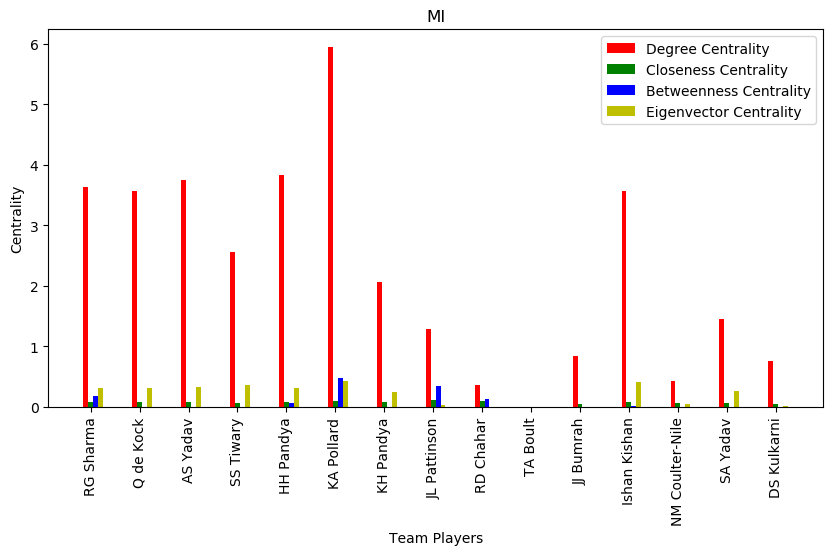

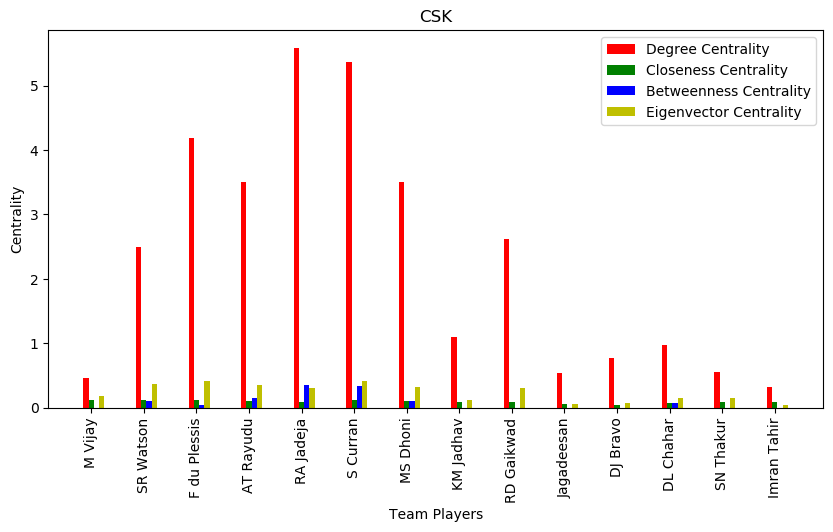

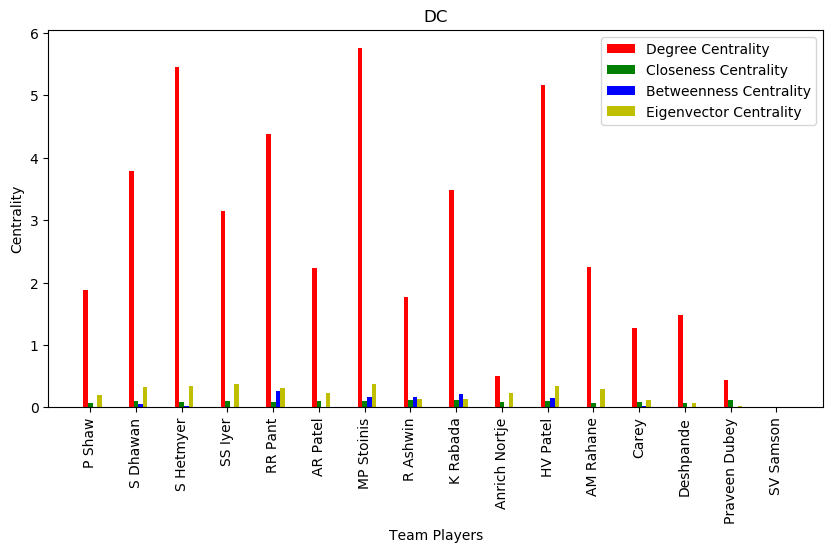

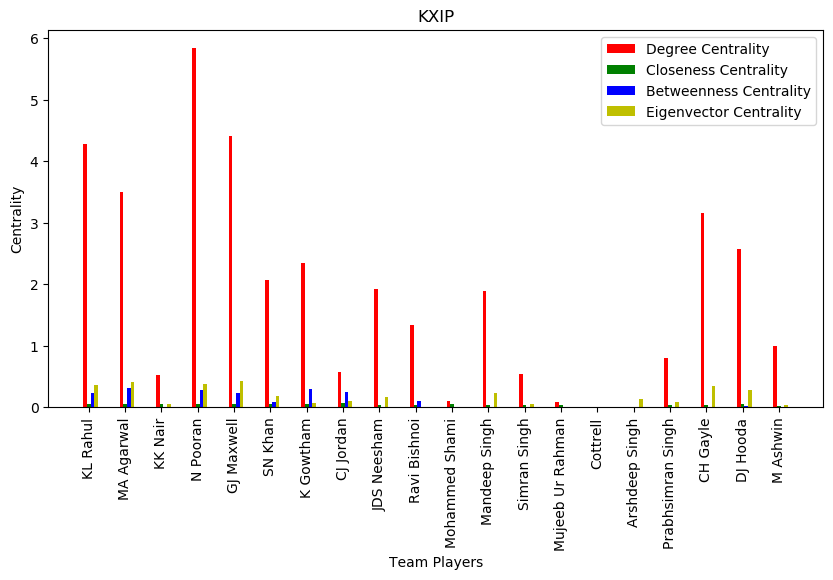

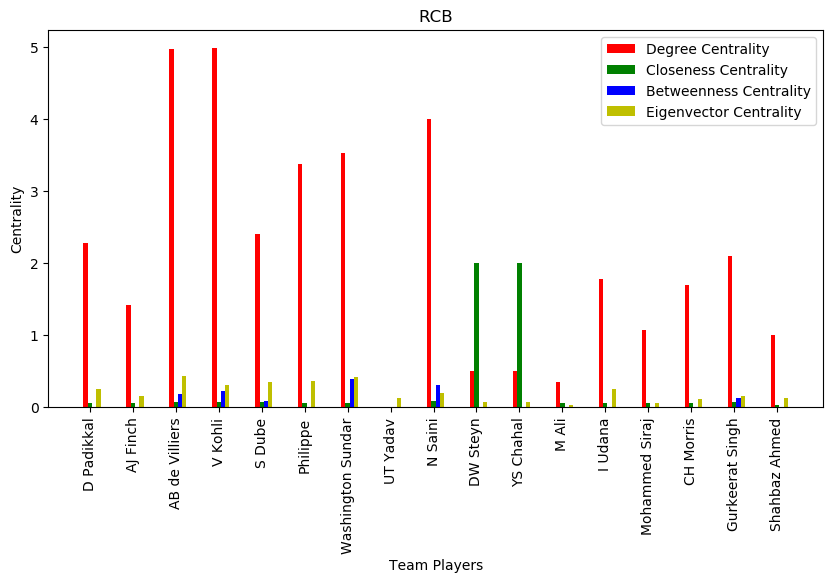

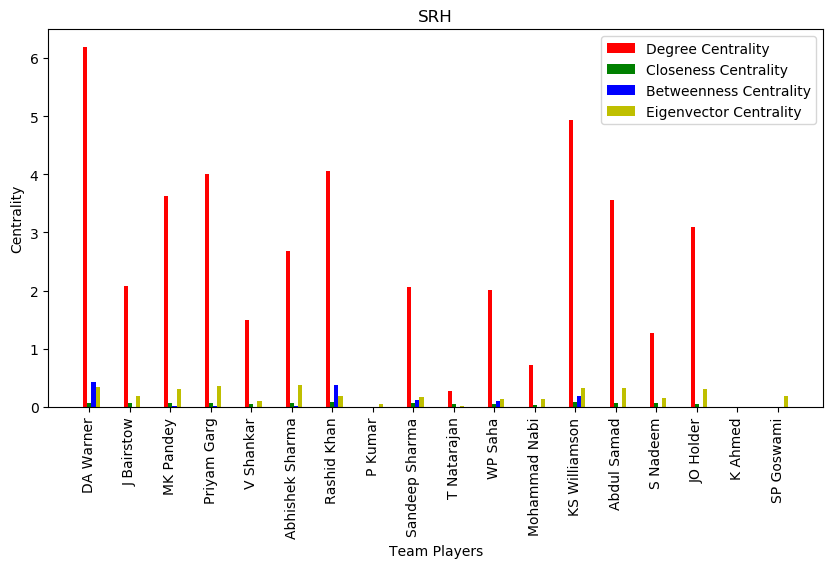

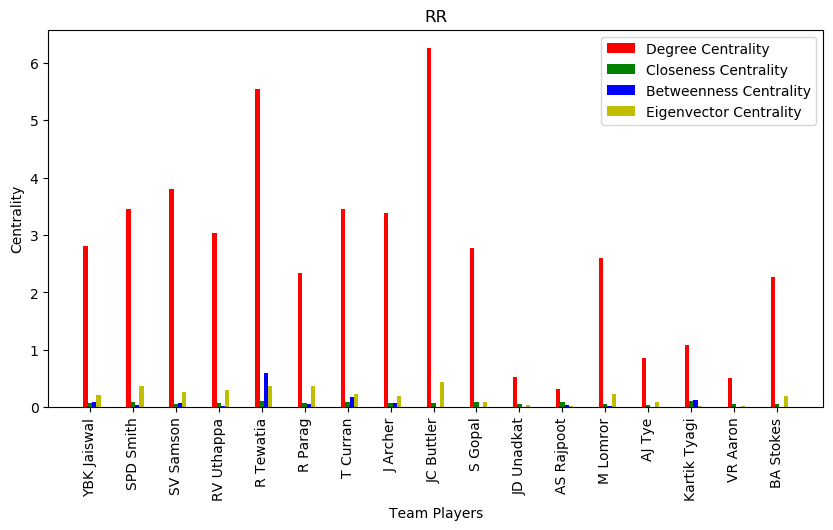

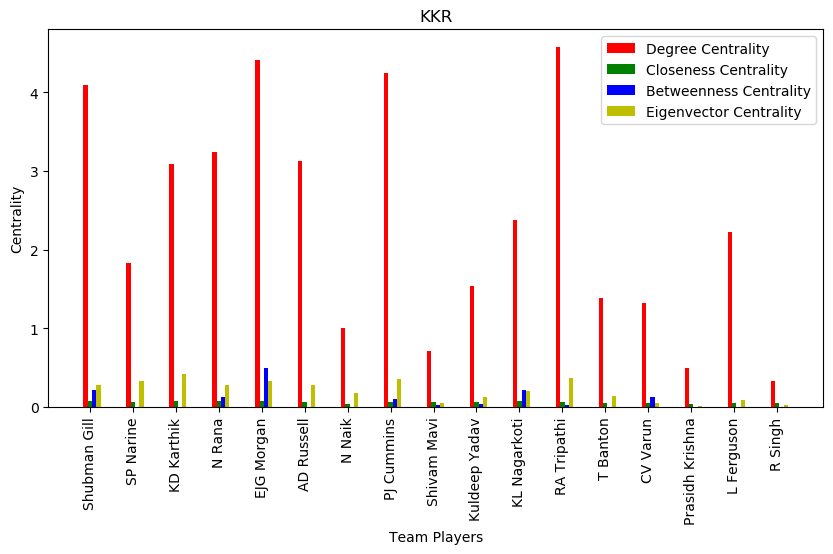

In [17]:
pp = PdfPages('Cent_bar.pdf')
for i in range(0,8):
    df_team=df[df['batting_team']==arr[i]]
    df_team=df_team.iloc[:,[2,3,6,7,8,15,17]]
    player=df_team['batsman'].unique()
    x=np.count_nonzero(player)
    ind = np.arange(x)  # the x locations for the groups
    width = 0.1      # the width of the bars
    fig = plt.figure(figsize = (10,5))
    ax = fig.add_subplot(111)
    temp=new_1[i]
    c1vals = temp['degree_centrality'].values
    rects1 = ax.bar(ind, c1vals, width, color='r')
    c2vals = temp['closeness_centrality'].values
    rects2 = ax.bar(ind+width, c2vals, width, color='g')
    c3vals = temp['Betweness_centrality'].values
    rects3 = ax.bar(ind+width*2, c3vals, width, color='b')
    c4vals = temp['Eigen_centrality'].values
    rects4 = ax.bar(ind+width*3, c4vals, width, color='y')
    plt.title(arr[i])
    ax.set_xlabel('Team Players')
    ax.set_ylabel('Centrality')
    ax.set_xticks(ind+width)
    ax.set_xticklabels(player)
    ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), 
              ('Degree Centrality', 'Closeness Centrality', 'Betweenness Centrality', 'Eigenvector Centrality' ) )
    plt.xticks(rotation=90)
    plt.savefig("Cent_bar_%s.jpg"%arr[i])
    pp.savefig()    
    plt.show()
    
    '''
    def autolabel(rects):
        for rect in rects:
            h = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%.2lf'%float (h), ha='center', va='bottom')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    autolabel(rects4)''' 
pp.close()  

# Visualization of Closeness, Betweennes and Eigenvector Centralities

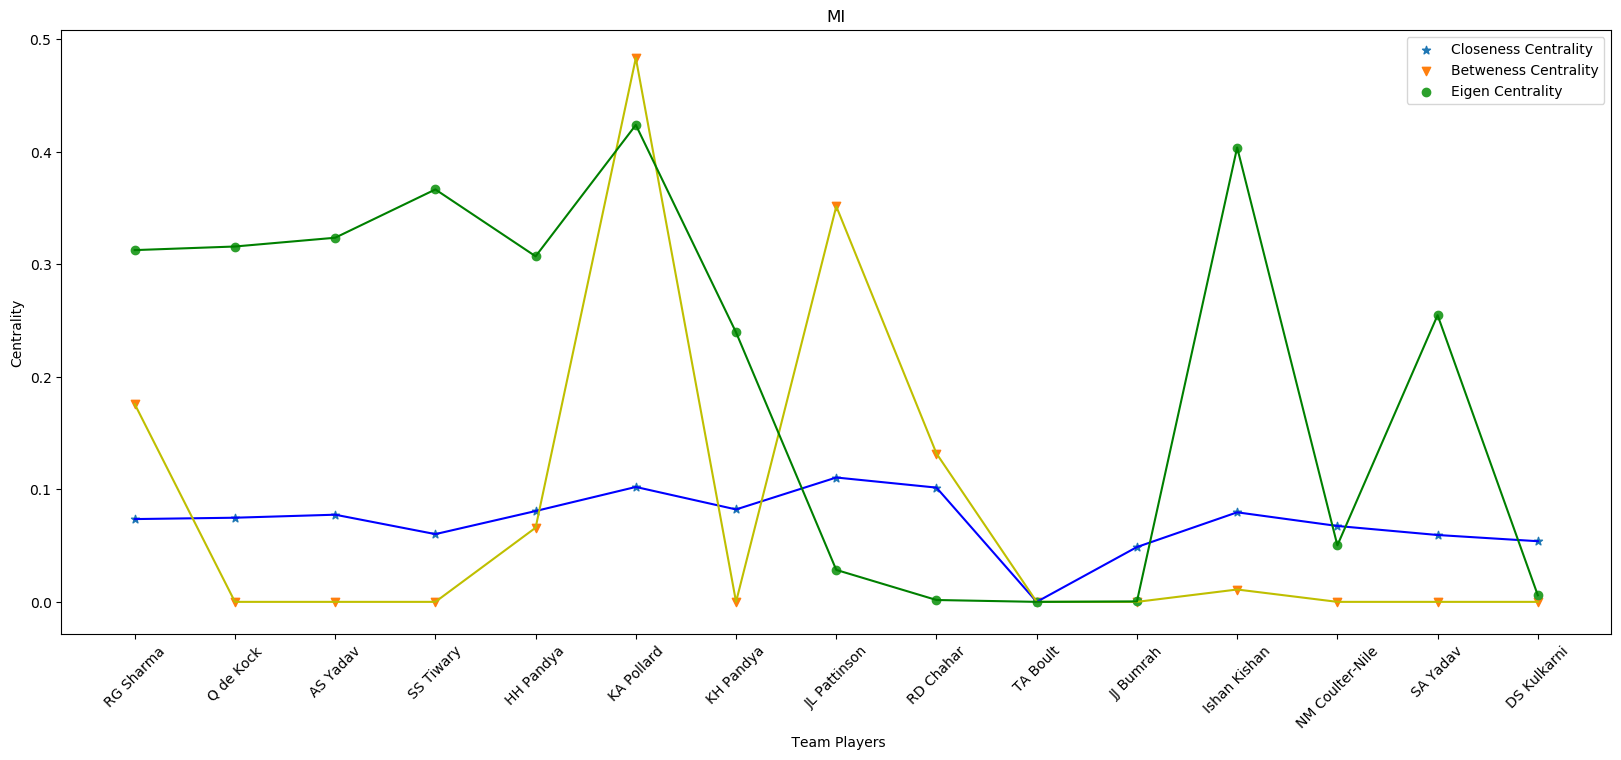

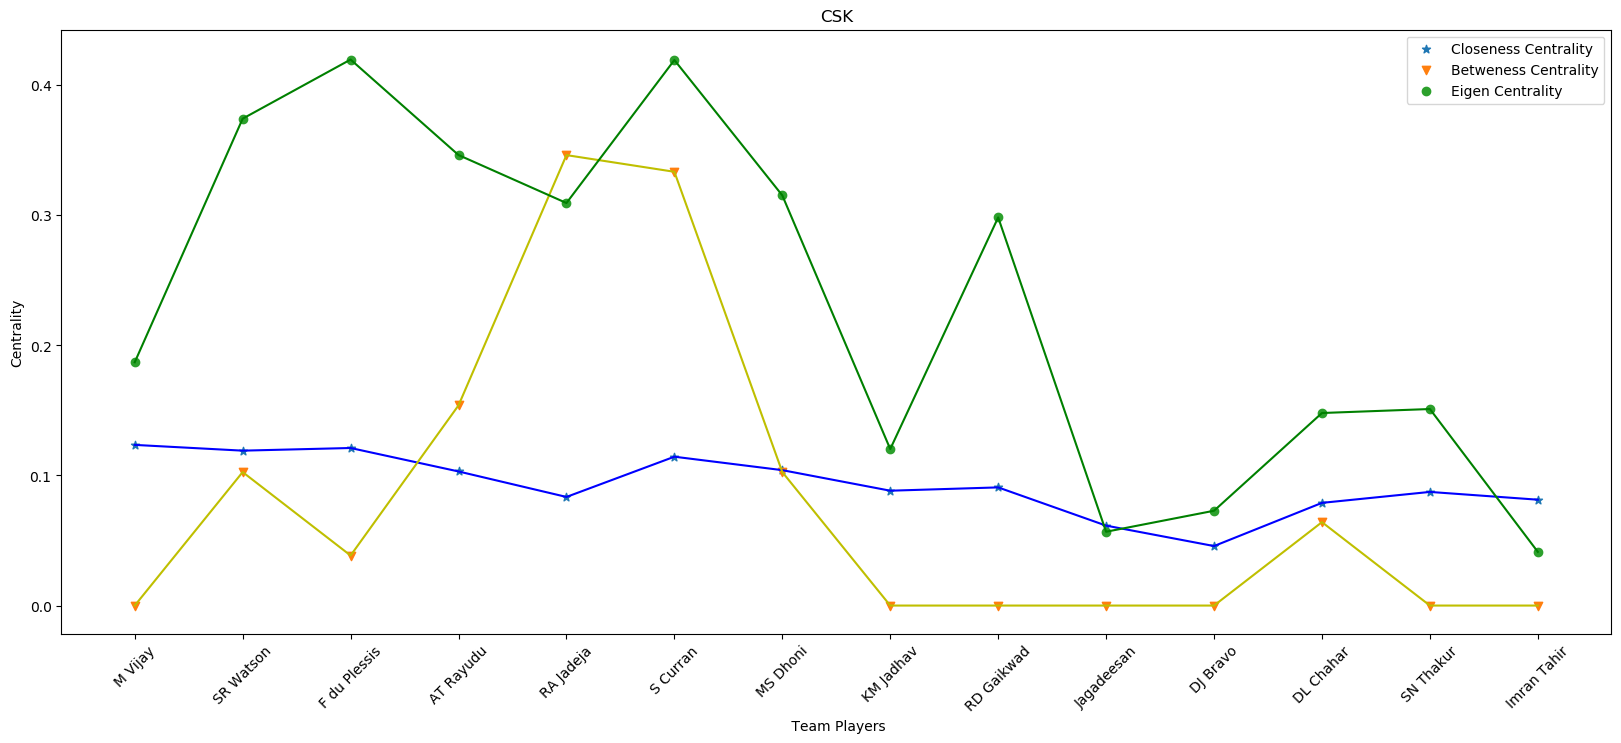

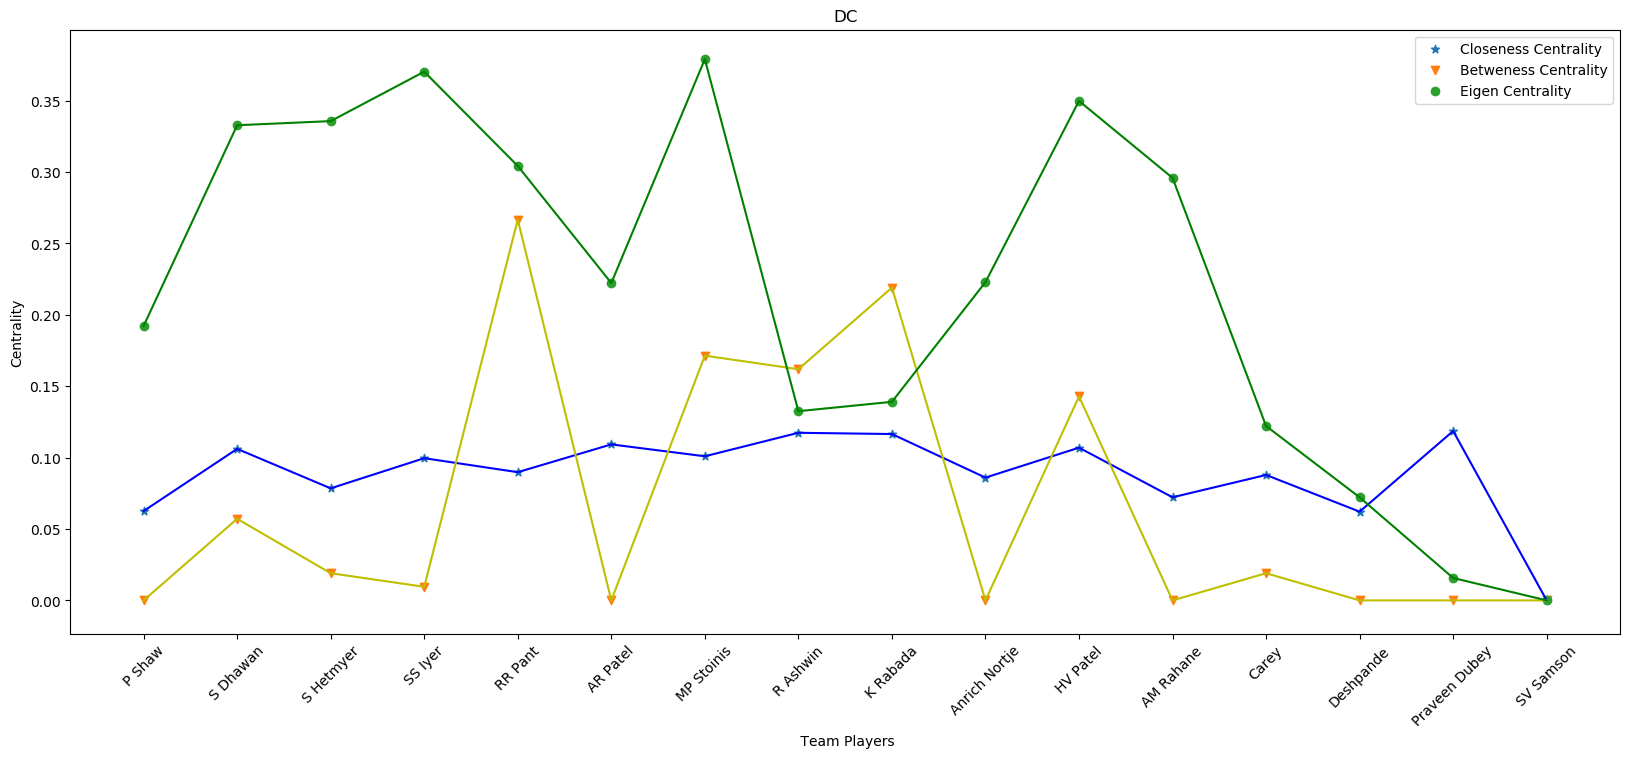

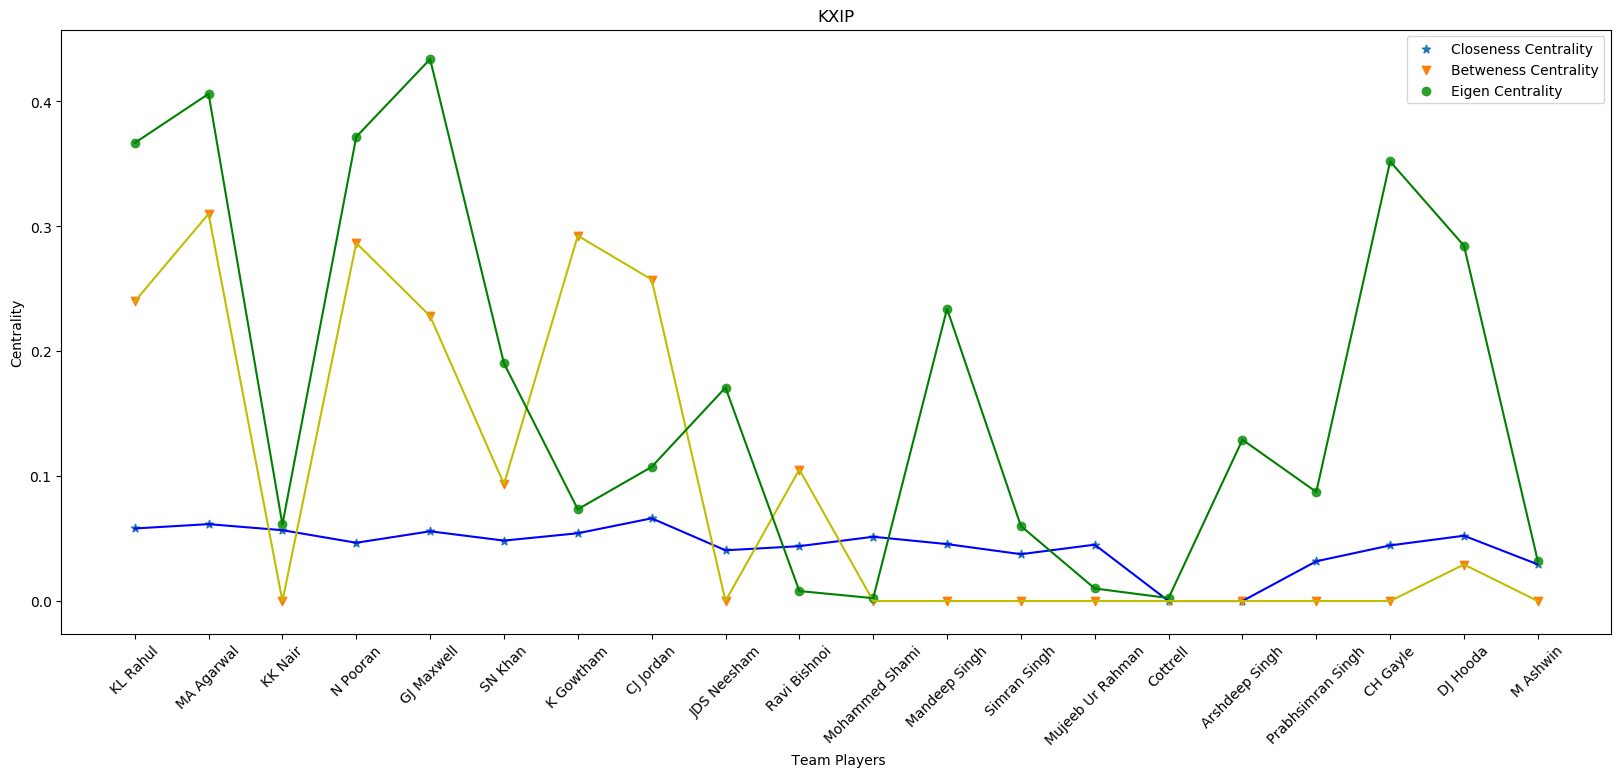

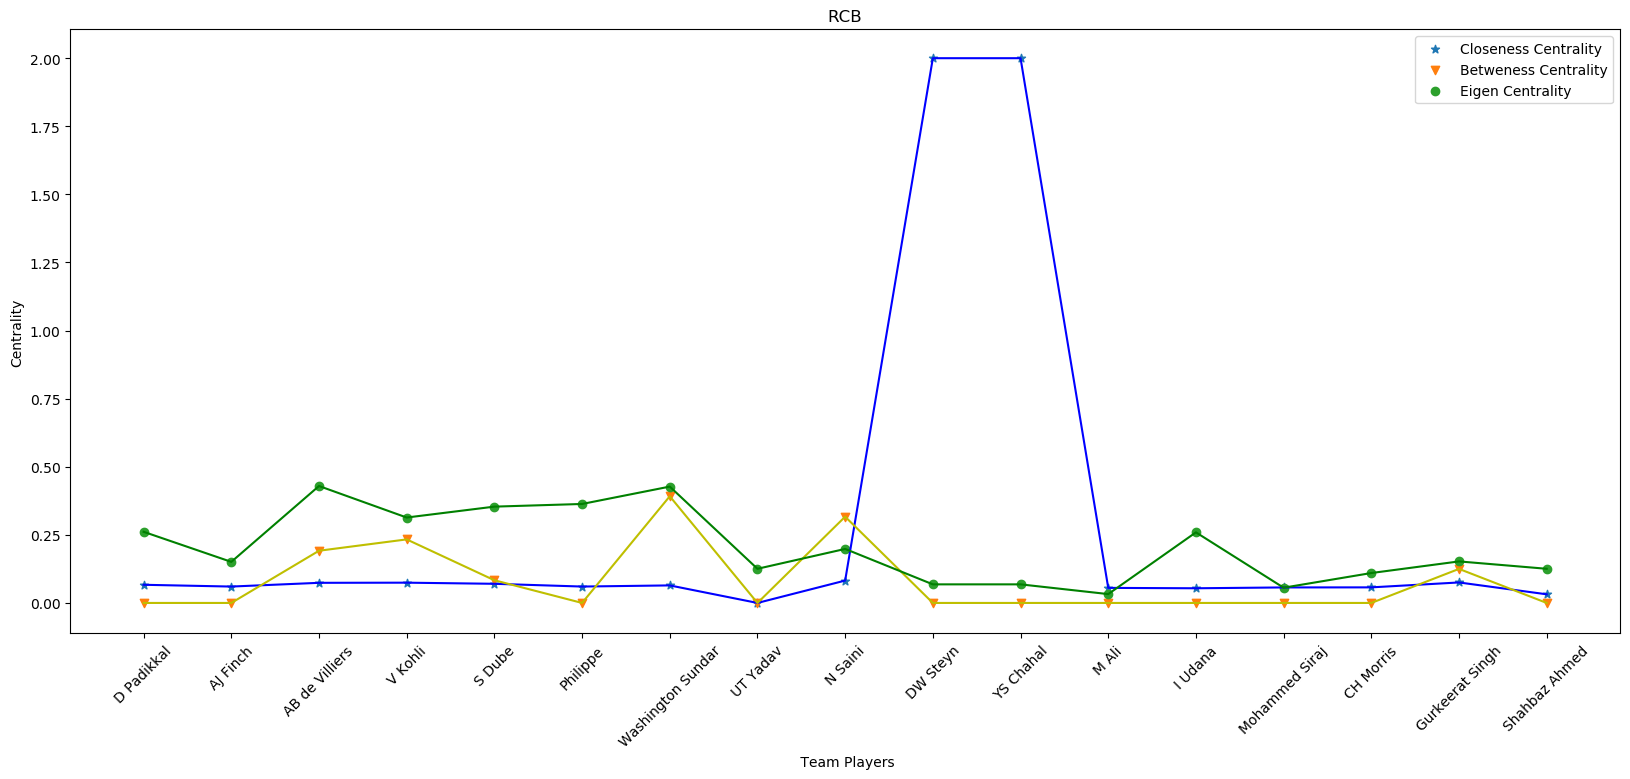

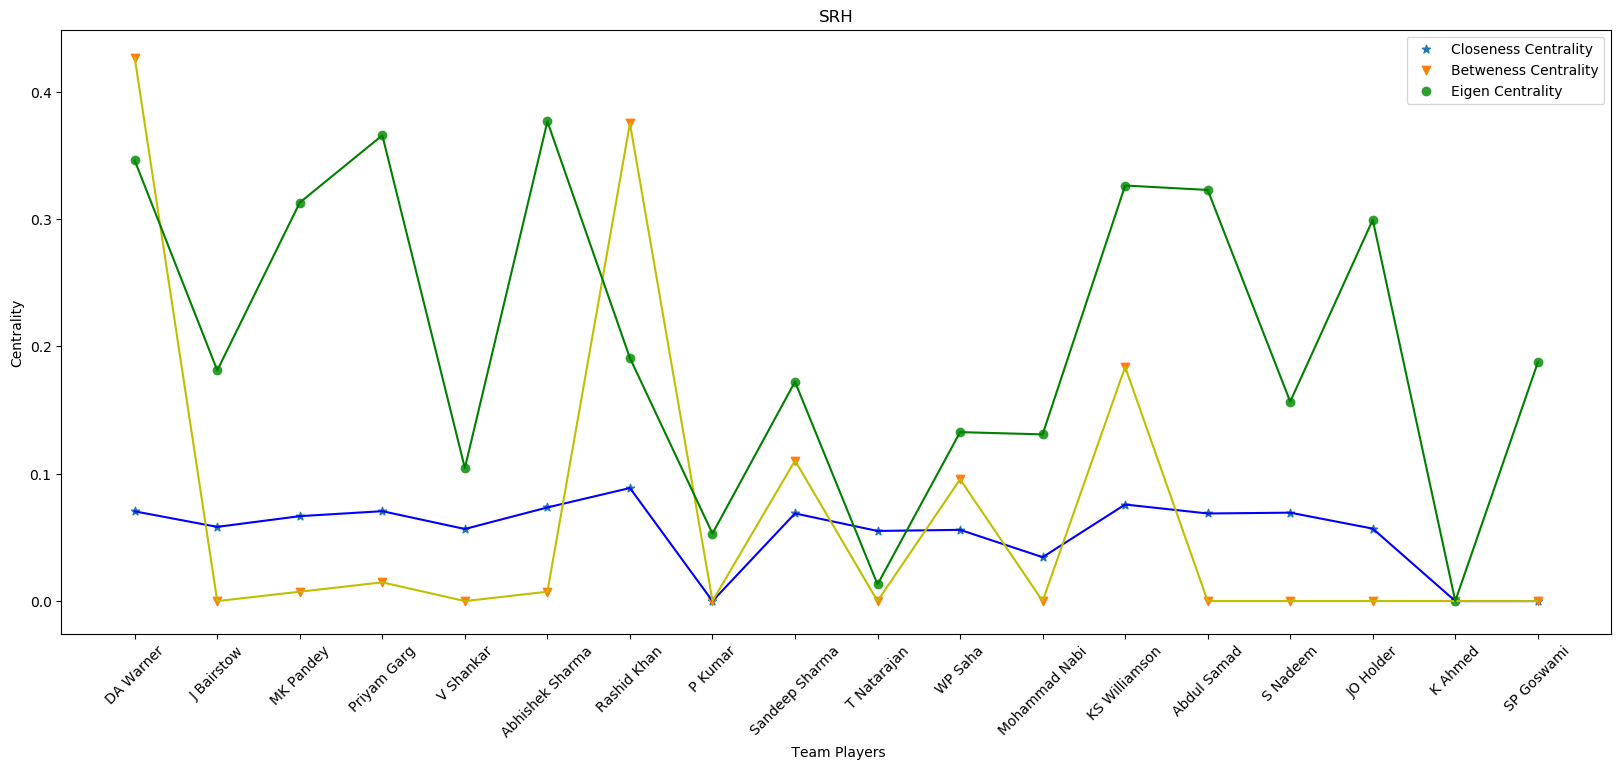

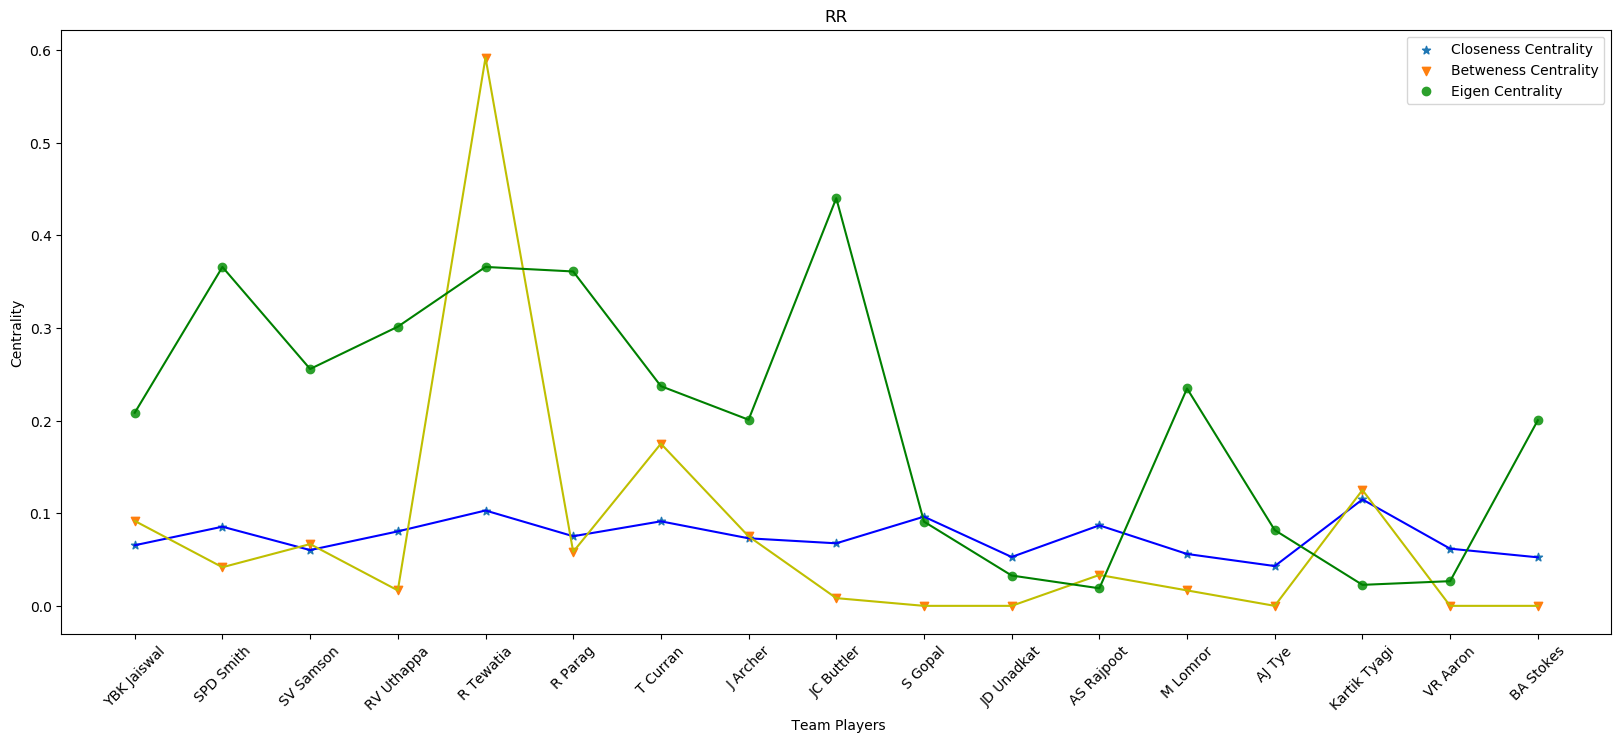

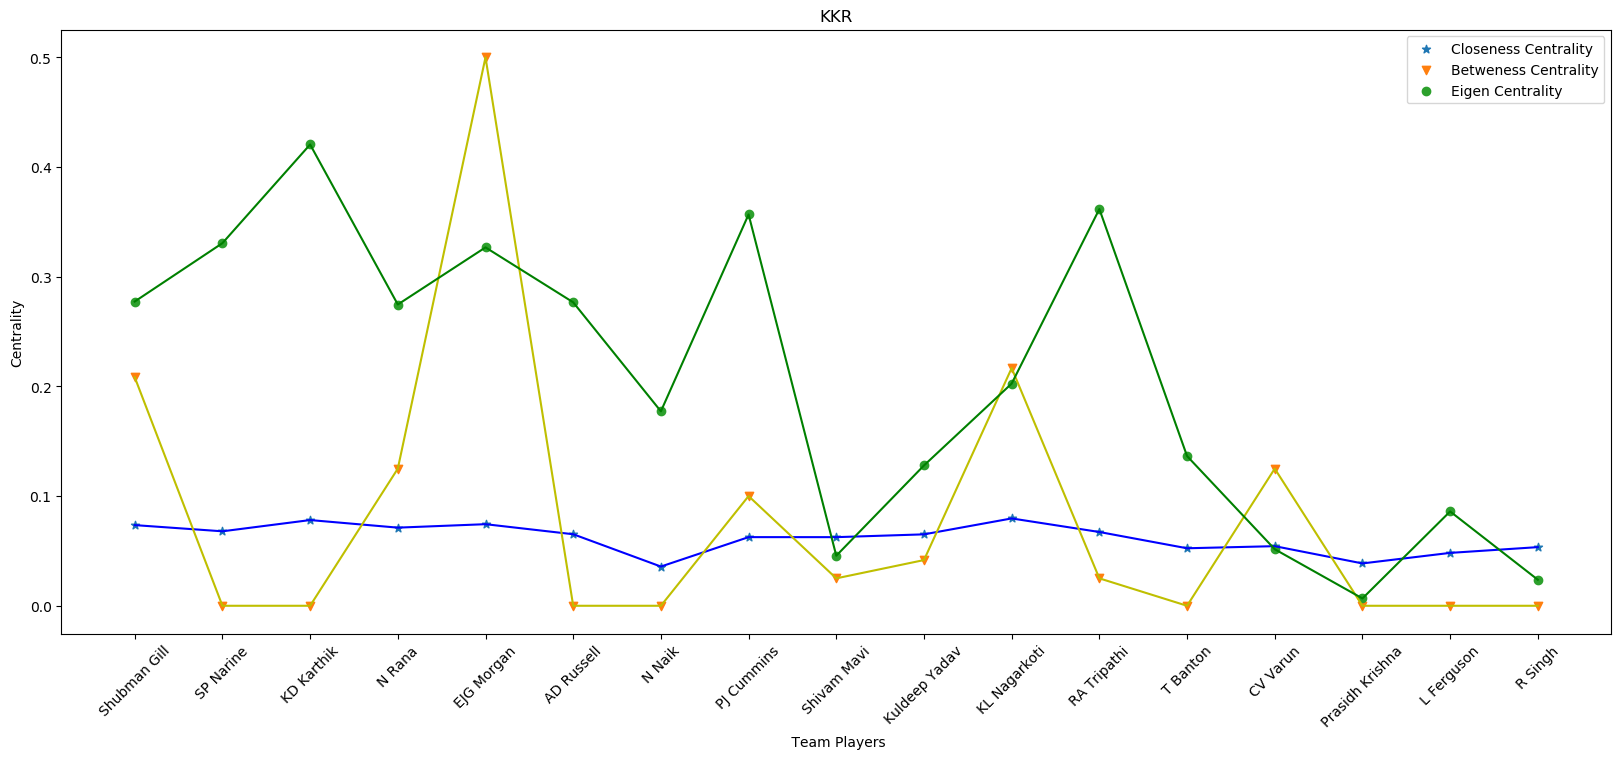

In [18]:
pp = PdfPages('Cent_scatter.pdf')
for i in range(0,8):
    df_team=df[df['batting_team']==arr[i]]
    df_team=df_team.iloc[:,[2,3,6,7,8,15,17]]
    player=df_team['batsman'].unique()
    # x=np.count_nonzero(player)
    # Scatterplot and Correlations
    # Data
    temp=new_1[i]
    x=player
    y1=temp['degree_centrality'].values
    y2=temp['closeness_centrality'].values
    y3=temp['Betweness_centrality'].values
    y4=temp['Eigen_centrality'].values

    # Plot
    plt.rcParams.update({'figure.figsize':(20,8), 'figure.dpi':100})
    #plt.scatter(x, y1, label='degree_centrality')
    plt.scatter(x, y2, marker= '*',label='Closeness Centrality')
    plt.scatter(x, y3, marker= 'v',label='Betweness Centrality')
    plt.scatter(x, y4, marker= 'o',label='Eigen Centrality')
    plt.plot(x,y2,color='b')
    plt.plot(x,y3,color='y')
    plt.plot(x,y4,color='g')
    plt.xticks(rotation=45)
    plt.title(arr[i])
    plt.xlabel(' Team Players')
    plt.ylabel('Centrality')
    plt.legend()
    plt.savefig("Cent_scatter_%s.jpg"%arr[i])
    plt.savefig(pp, format='pdf')
    pp.savefig()    
    plt.show()
pp.close() 